<a href="https://colab.research.google.com/github/KristinaBorovikS/ML/blob/main/HW5/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

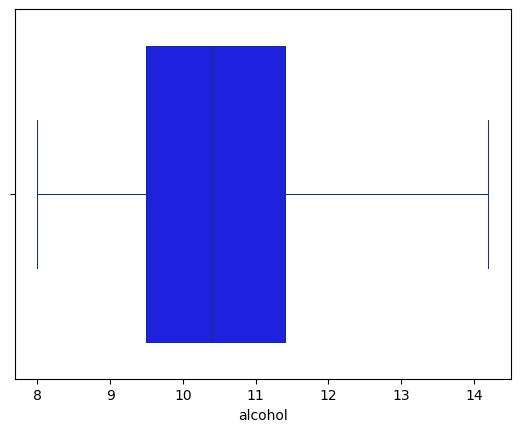

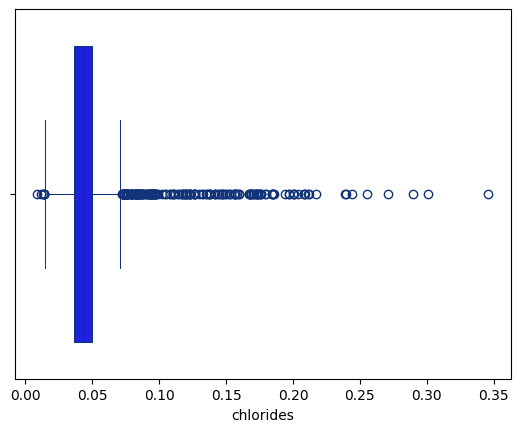

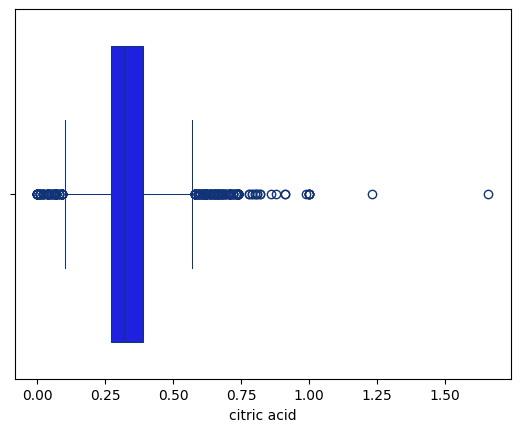

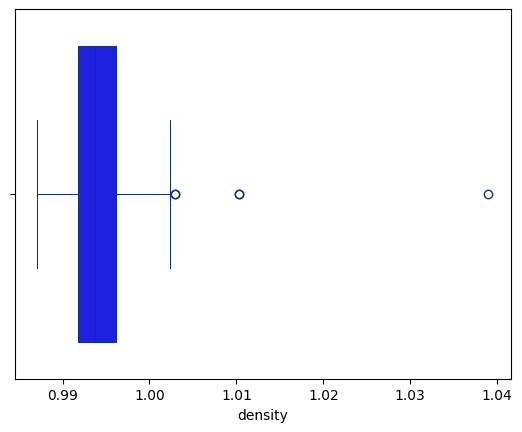

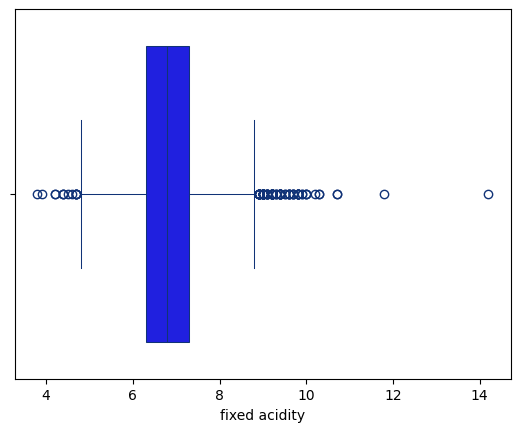

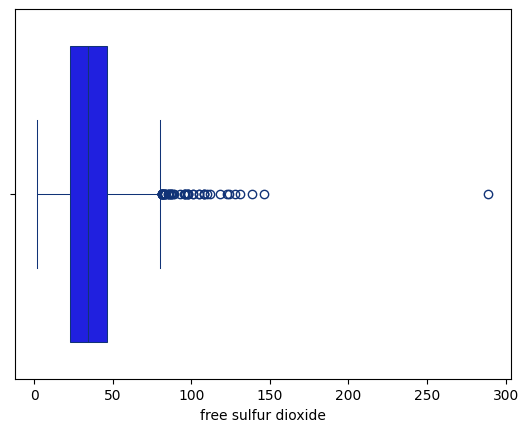

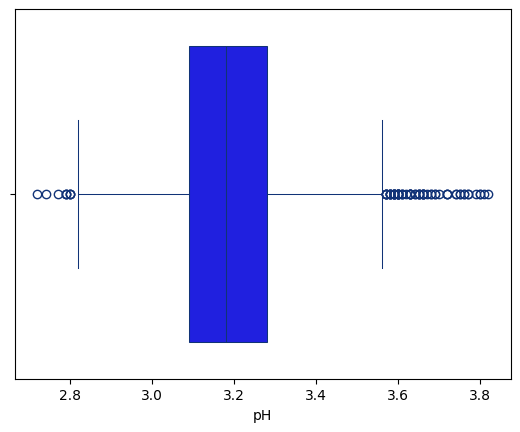

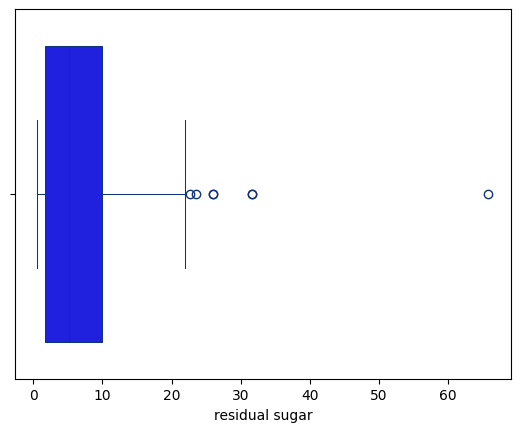

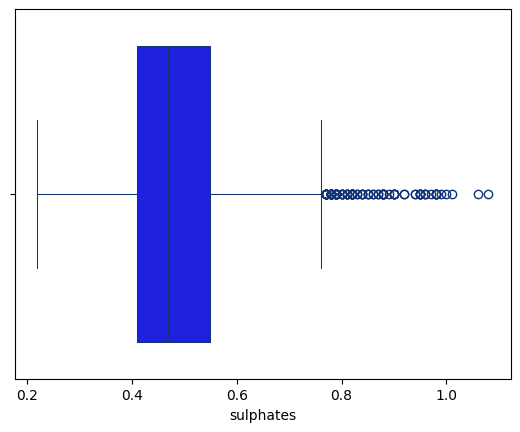

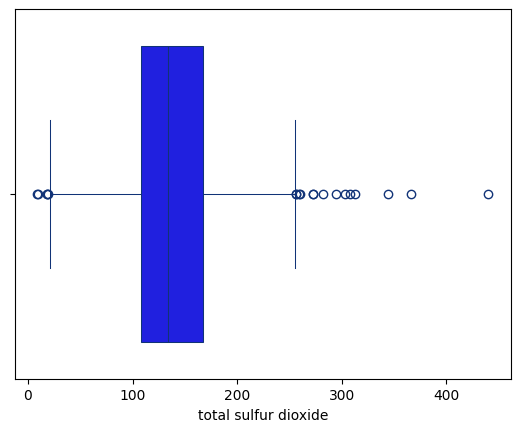

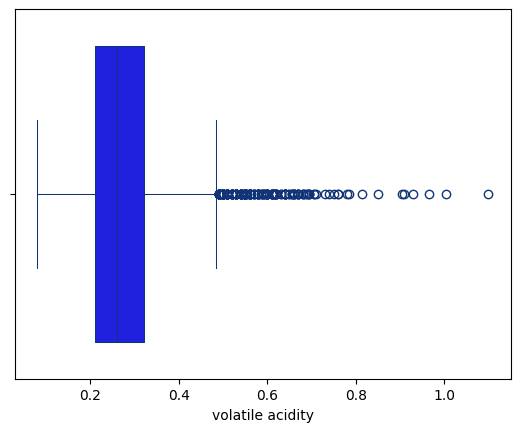

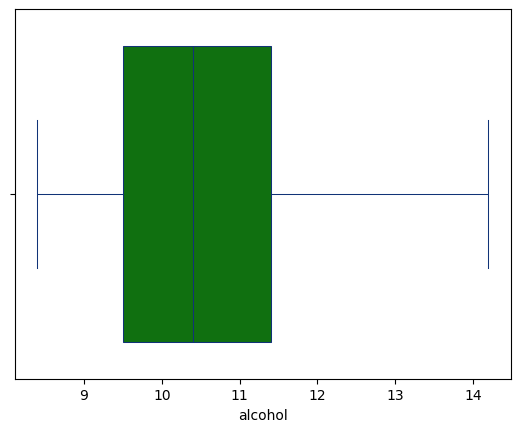

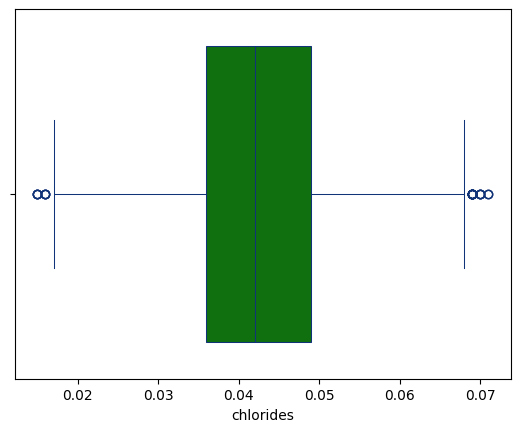

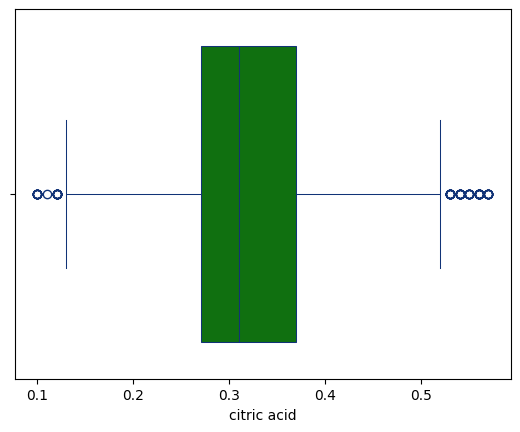

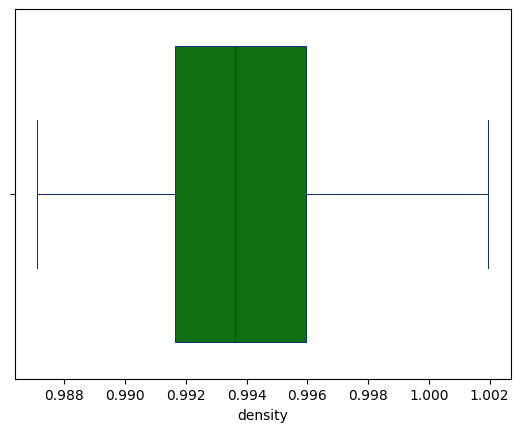

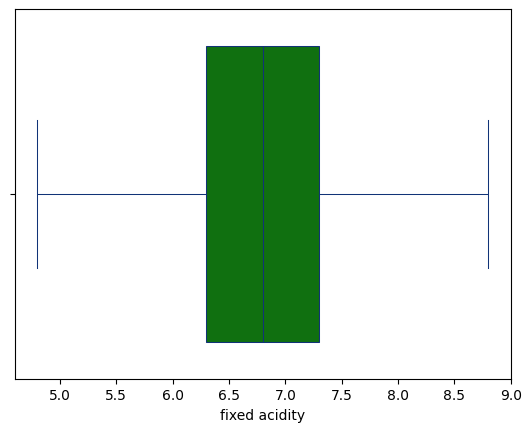

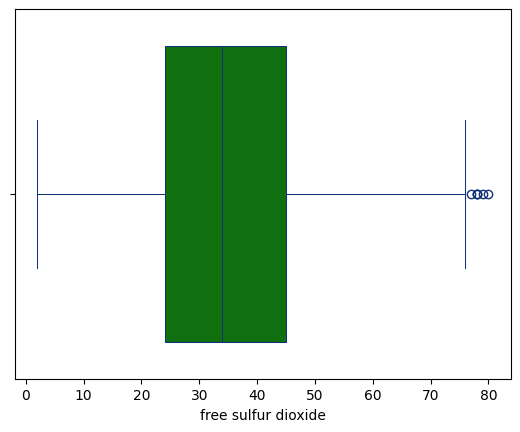

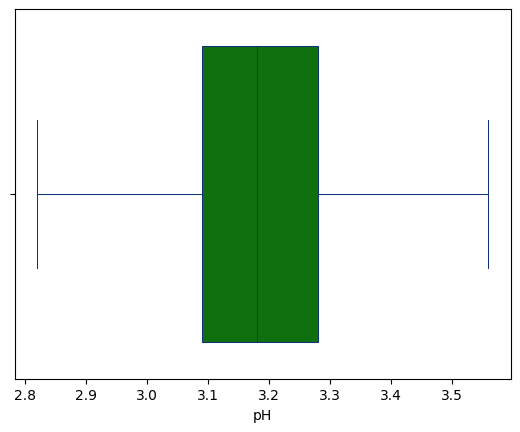

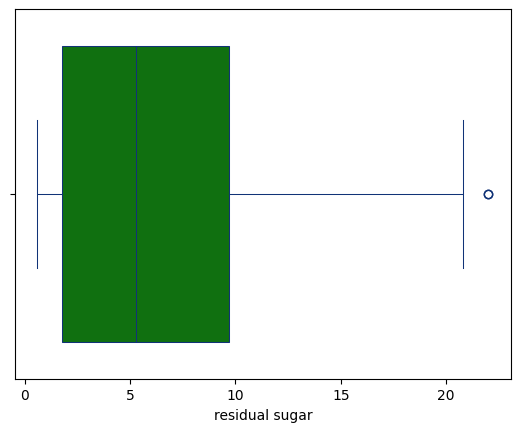

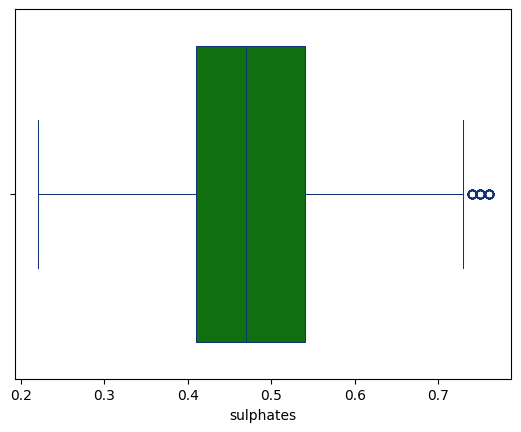

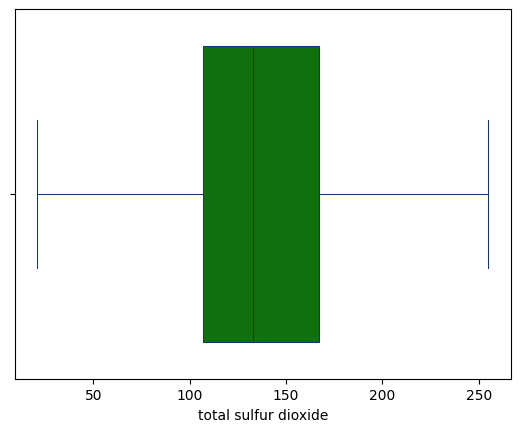

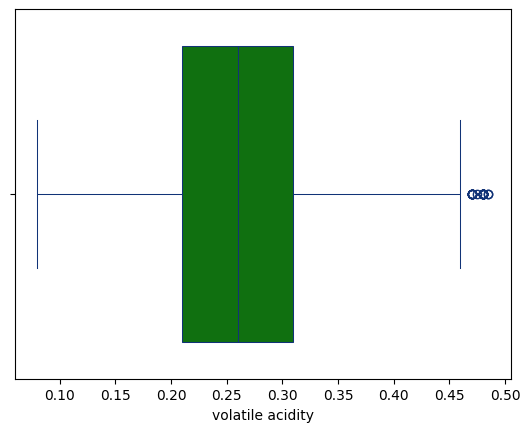

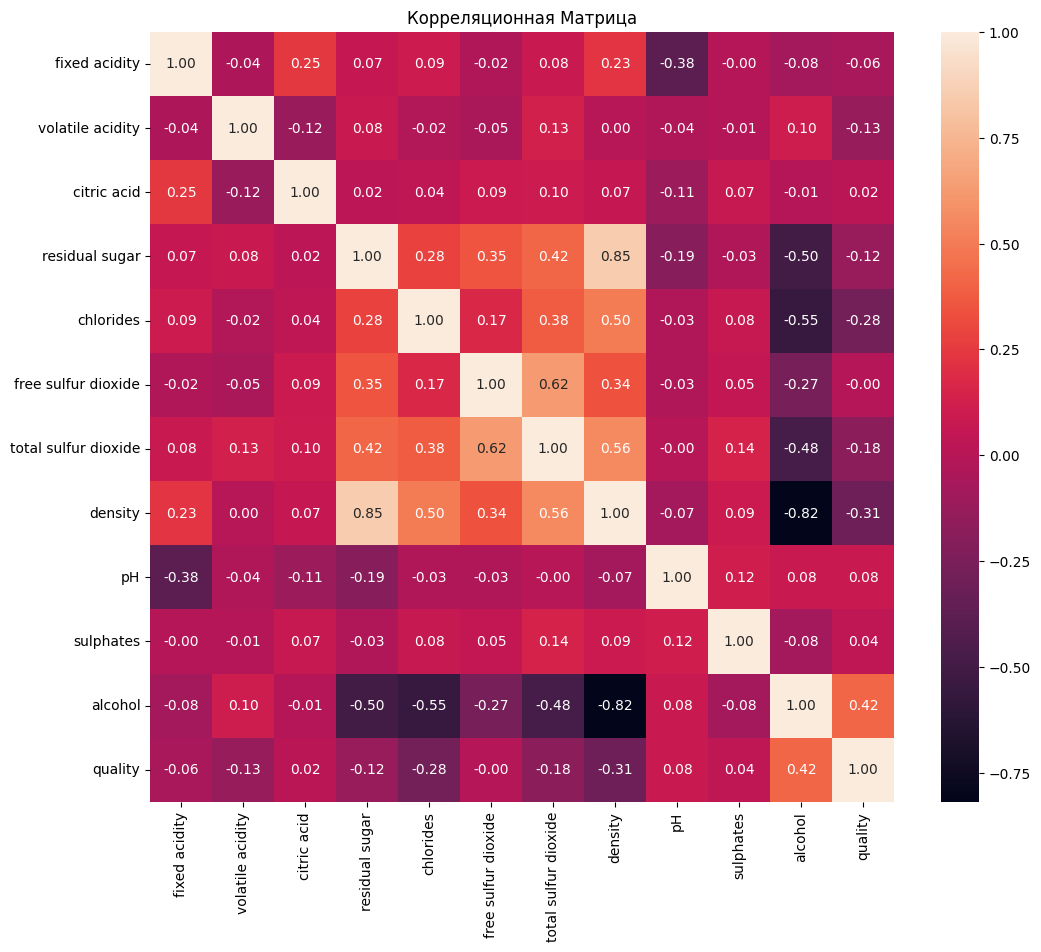

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  sulfur ratio  alcoholsqrt  
0      8.8        6      0.264706    

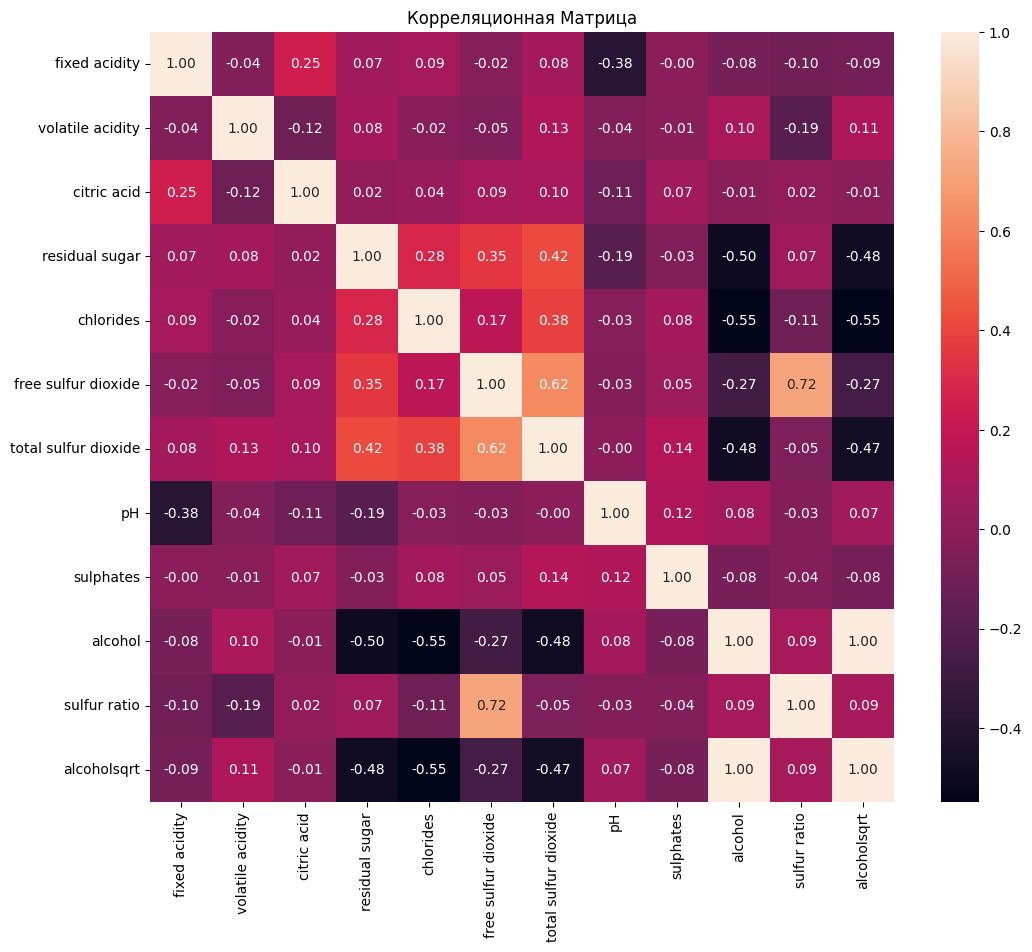

In [53]:

import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv(r'wine.csv')

if df.empty:
    print('DataFrame is empty!')

print(df.head(5))
print(df.info())

sns.boxplot(data=df, x=df['alcohol'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['chlorides'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['citric acid'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['density'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['fixed acidity'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['free sulfur dioxide'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['pH'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['residual sugar'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['sulphates'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['total sulfur dioxide'], color='b', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['volatile acidity'], color='b', linecolor="#137", linewidth=.75)
plt.show()




Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

mask_no_out = ((df >= lower) & (df <= upper)).all(axis = 1)

df[mask_no_out].shape


df = df[mask_no_out]




sns.boxplot(data=df, x=df['alcohol'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['chlorides'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['citric acid'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['density'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['fixed acidity'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['free sulfur dioxide'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['pH'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['residual sugar'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['sulphates'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['total sulfur dioxide'], color='g', linecolor="#137", linewidth=.75)
plt.show()
sns.boxplot(data=df, x=df['volatile acidity'], color='g', linecolor="#137", linewidth=.75)
plt.show()







plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title('Корреляционная Матрица')
plt.show()


df['sulfur ratio'] = df['free sulfur dioxide']/df['total sulfur dioxide']
df['alcoholsqrt'] = df['alcohol']*df['alcohol']
print(df.head(5))
print(df.info())

X = df.drop(columns=['quality'])
X = X.drop(columns=['density'])
y = df['quality']


plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title('Корреляционная Матрица')
plt.show()






провели EDA . По ящикам с усами видно большое количество выбросов , они возникают в виду особенностей и тонкостей в процессе изготовления вина , длительности выдержки напитка,погоды при созревании сырья  и прочими деталями , заменять их будет неорретно т к сренее значение может смещать модель , они были удалены по правилу 1.5 межквартильных расстояния , чтобы не смещать модель. По ковариоционной матрице видны признаки с большой коррелляцией , удаляем колонку density  тк она дает большую зависимость .Так же добавляем новые признаки для возможного улучлшения метрики , рассчитаем долю свобоlных sulfur dioxide(свободные sulfur dioxide / все sulfur dioxide ) и добавим ее в признаки , так же добавили квадрат от значения алкоголя .

Best hyperparameters: {'n_estimators': 147}
Best value: 0.363449018776299
*****************
Метрики качества модели:
*****************
MAE: 0.5125
MSE: 0.3896
RMSE: 0.6242
R²: 0.3642


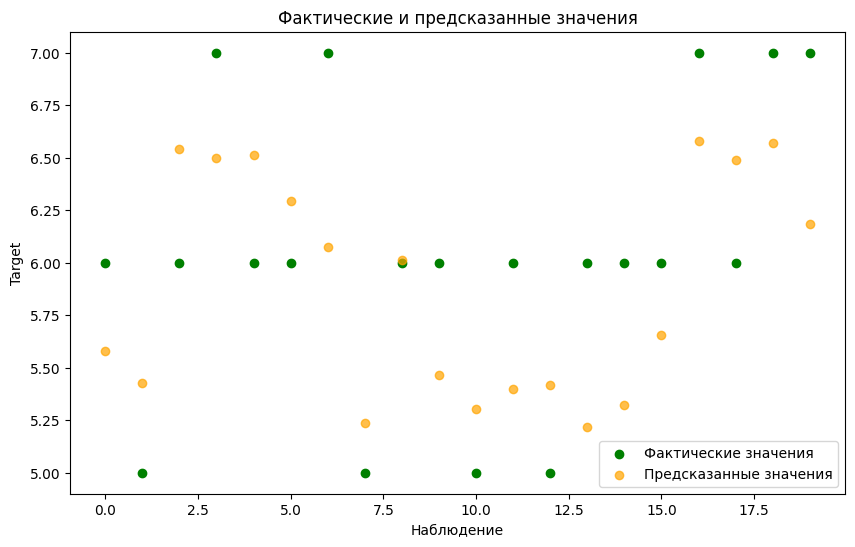

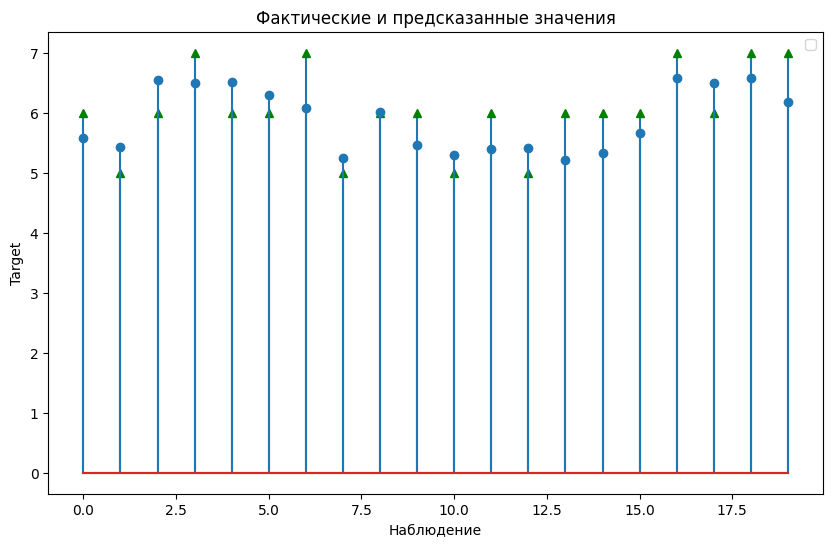

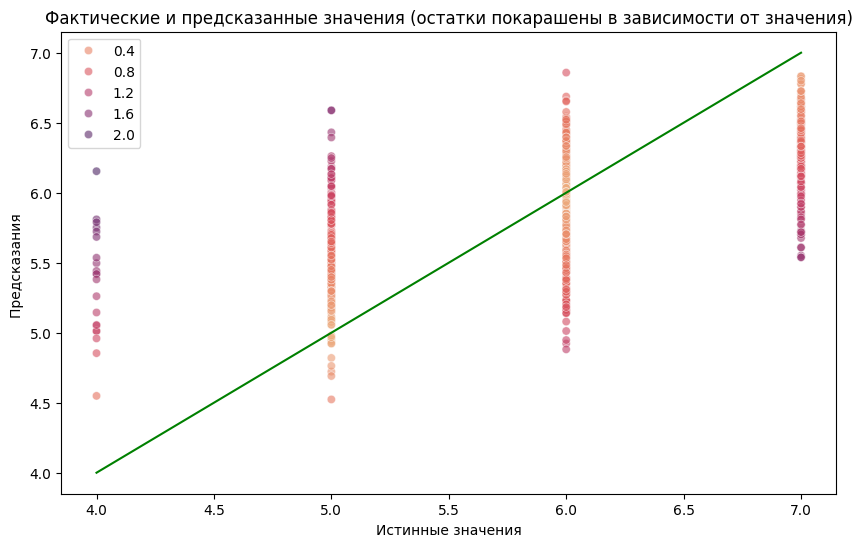

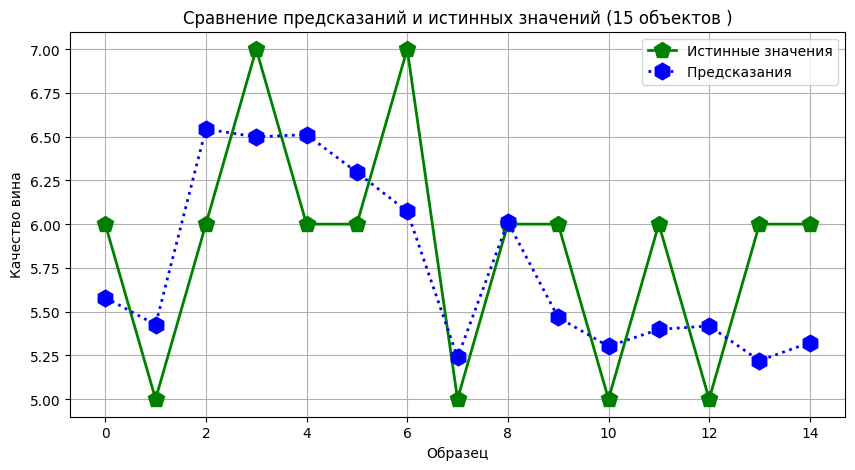

In [54]:


!pip install --quiet optuna

import optuna






scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def objective(trial):
   X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
   n_estimators = trial.suggest_int("n_estimators", 100, 150)
   model = GradientBoostingRegressor(n_estimators=n_estimators)
   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2

pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=10)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(n_estimators=study.best_params['n_estimators'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison = []
r2comparison.append({'model':'GradBoosting',
                'R2':r2})

print(f'*****************')
print(f'Метрики качества модели:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Метрика градиентного бутинга средняя , хотя мы и использовали подбор гиперпараметров

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 3086, number of used features: 12
[LightGBM] [Info] Start training from score 5.872003
*****************
Метрики качества модели:
*****************
MAE: 0.4641
MSE: 0.3423
RMSE: 0.5851
R²: 0.4414


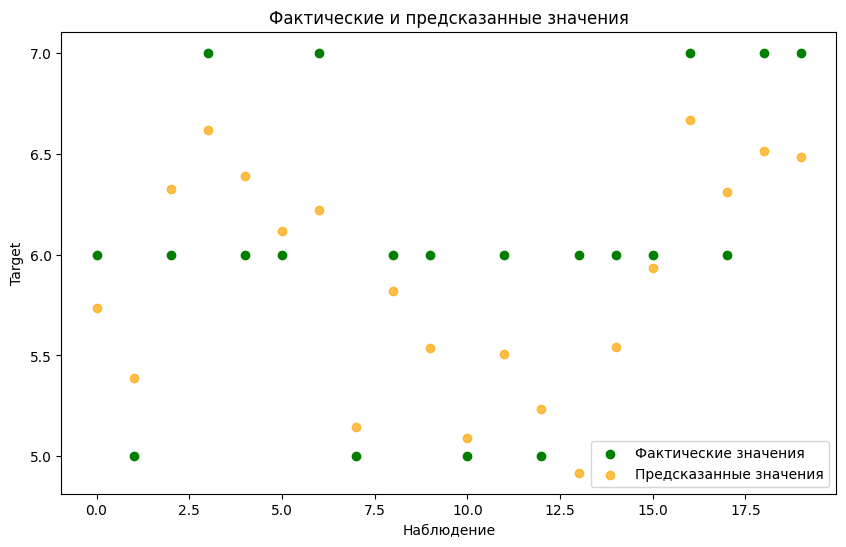

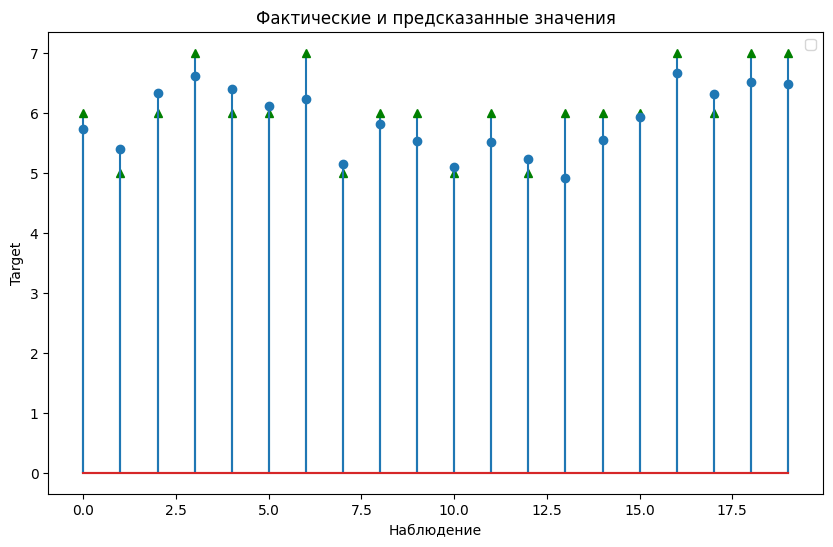

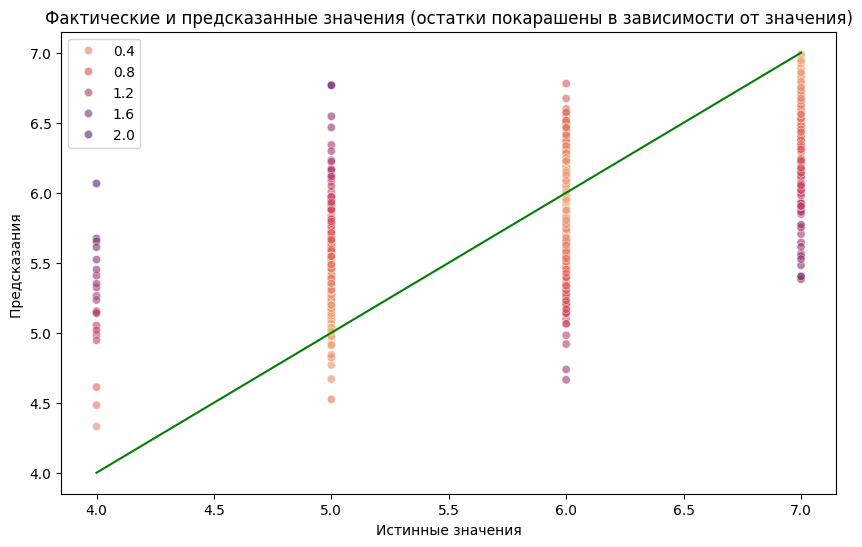

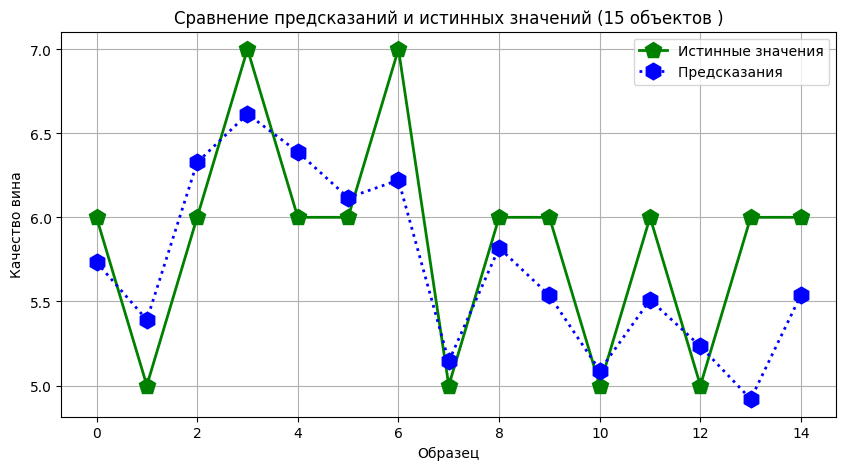

In [55]:
!pip install lightgbm
from lightgbm import LGBMRegressor


model=LGBMRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

r2comparison.append({'model':'LGBMRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()





Модель справилась лучше градиентного бустинга,однако все равно средние метрики

Best hyperparameters: {'n_estimators': 136, 'learning_rate': 0.02671261509637682, 'max_depth': 4}
Best value: 0.42869681119918823
*****************
Метрики качества модели :
*****************
MAE: 0.5205
MSE: 0.3974
RMSE: 0.6304
R²: 0.3514


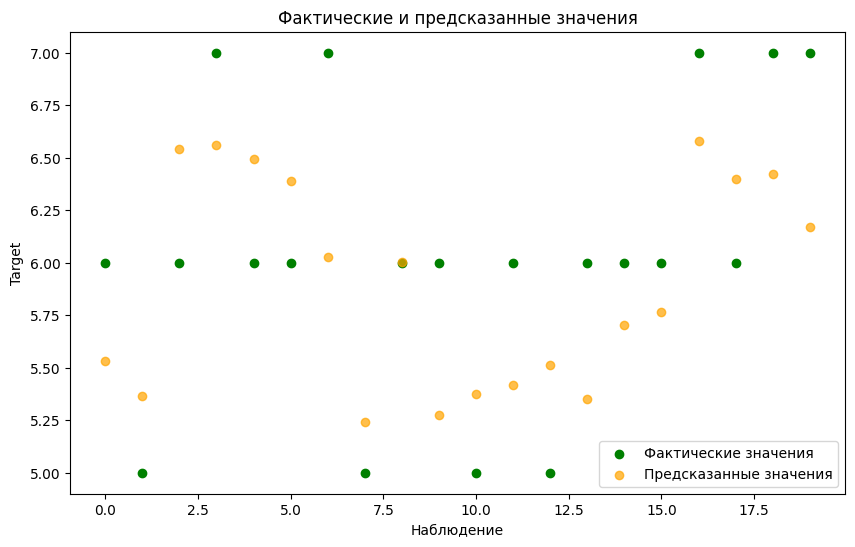

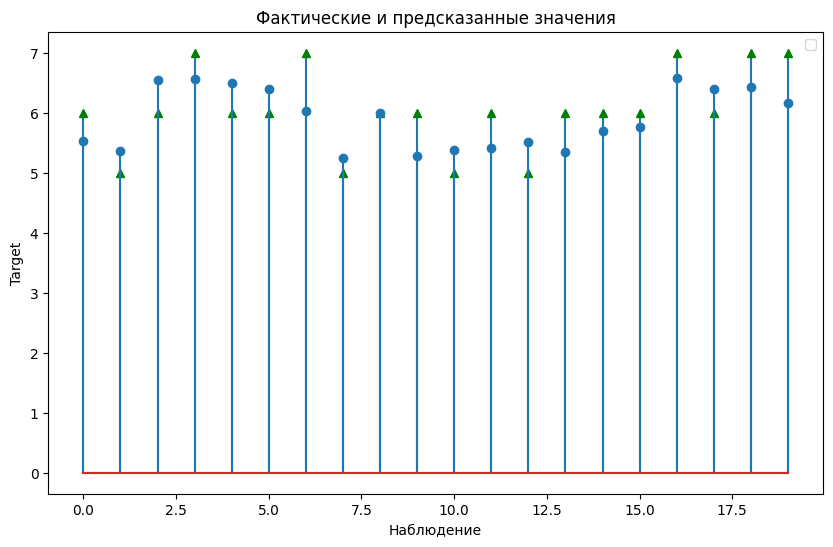

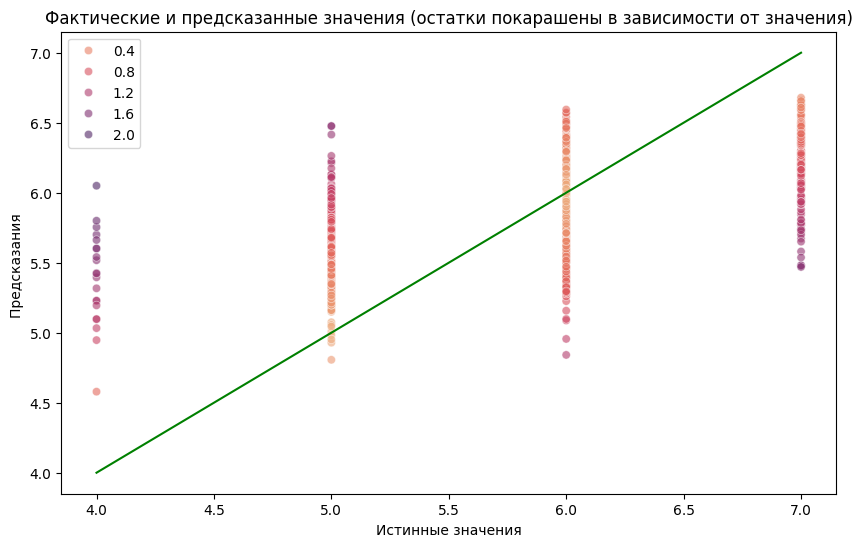

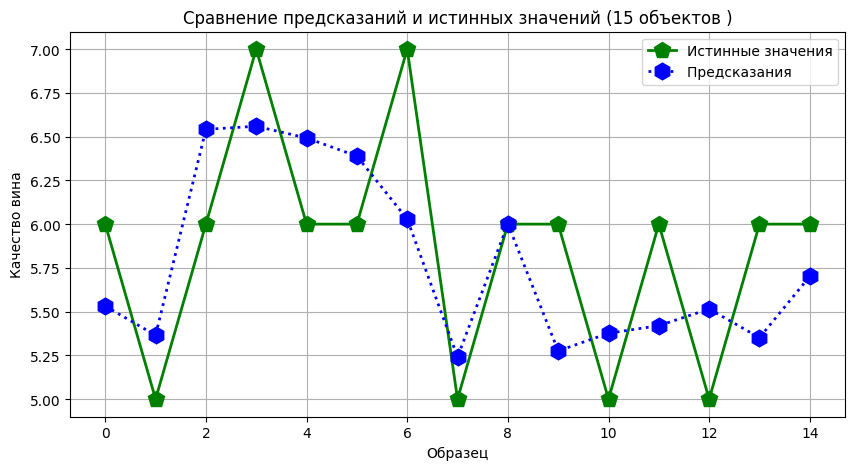

In [56]:
!pip install xgboost
from xgboost import XGBRegressor

def objective(trial):

   n_estimators = trial.suggest_int("n_estimators", 100, 150)
   learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
   max_depth = trial.suggest_int("max_depth", 3, 6)
   model = XGBRegressor(n_estimators=n_estimators)
   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2

pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

model = XGBRegressor(n_estimators=study.best_params['n_estimators'],learning_rate= study.best_params['learning_rate'],max_depth= study.best_params['max_depth'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'XGBRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()





Даже с подбором параметров модель справилась хуже Light GBM, метрика средняя, в последнем графике можно увидеть интересные предсказания модели по дуге , а не по линии , как в прошлых алгоримах

Best hyperparameters: {'n_estimators': 149}
Best value: 0.5034375859308415
*****************
Метрики качества модели Extra Trees Regressor:
*****************
MAE: 0.3847
MSE: 0.3043
RMSE: 0.5516
R²: 0.5034


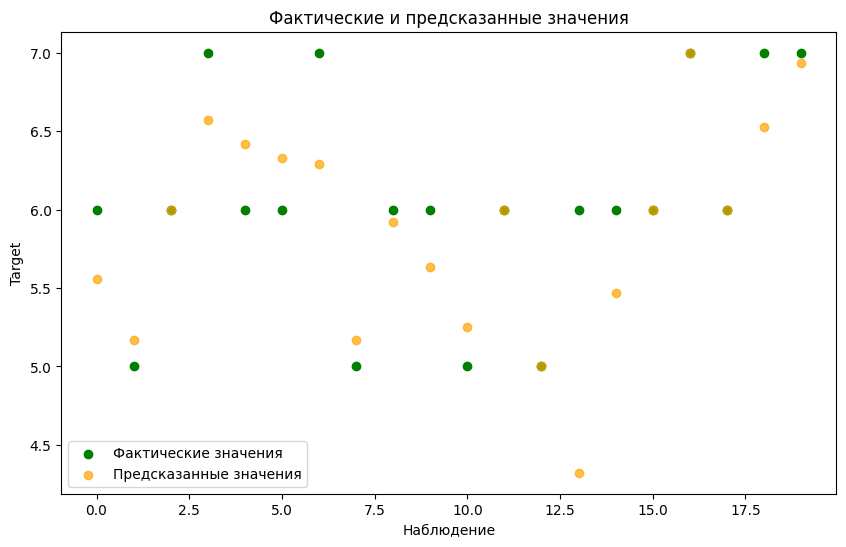

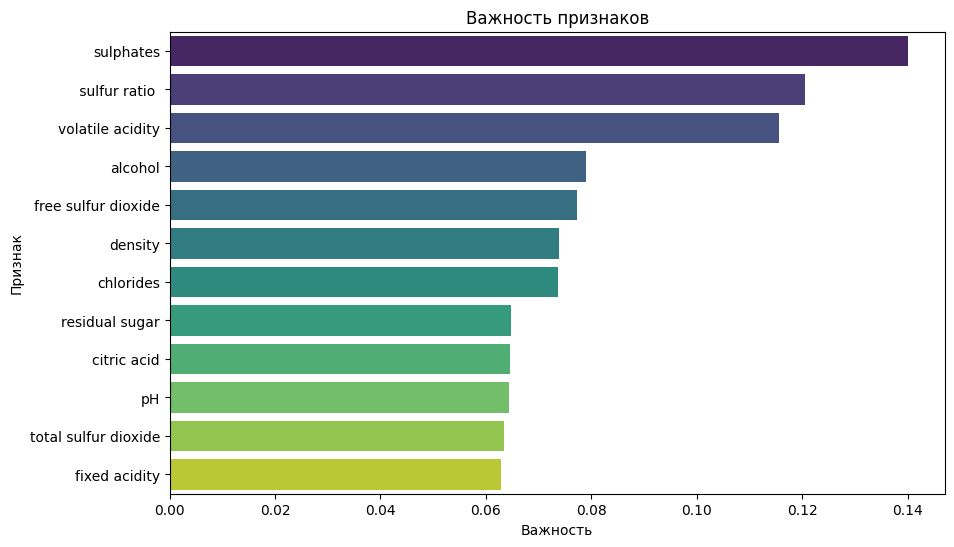

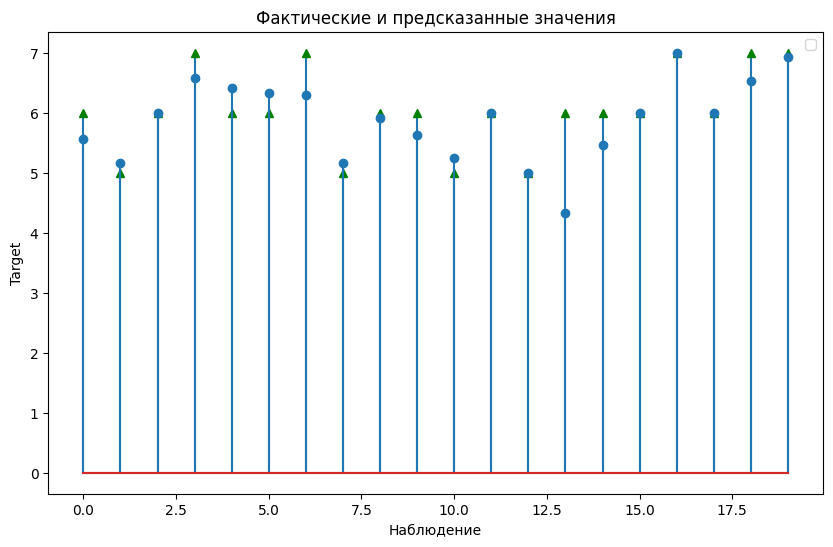

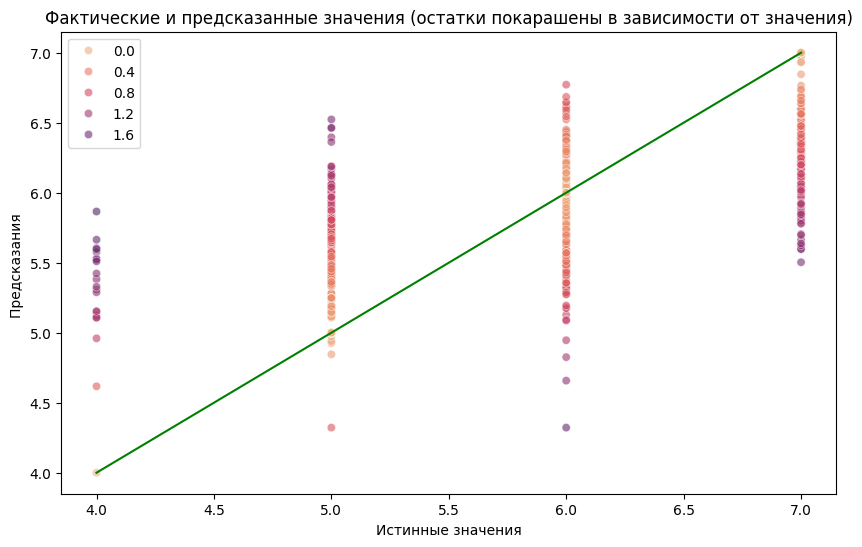

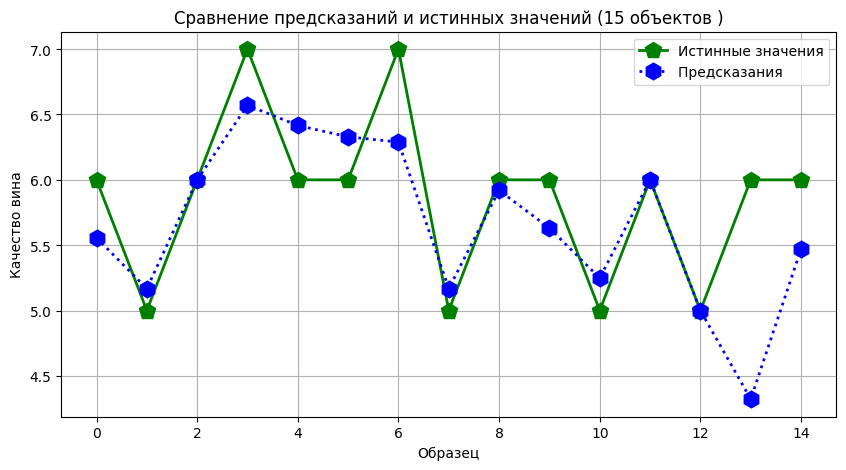

In [57]:


from sklearn.ensemble import ExtraTreesRegressor


def objective(trial):

   n_estimators = trial.suggest_int("n_estimators", 100, 150)
   model =  ExtraTreesRegressor(
    n_estimators=n_estimators,
    random_state=42,
    n_jobs=-1
)
   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2

pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

etr = ExtraTreesRegressor(
    n_estimators=study.best_params['n_estimators'],
    random_state=42,
    n_jobs=-1
)
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'Extra Trees Regressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели Extra Trees Regressor:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




importances = etr.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol',' sulfur ratio ','alcoholsqrt'])[indices], palette='viridis')
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()



Деревянная модель справилась лучше бустов , видем на графике примерно близкие предсказания , метрика средняя , но лучше предыдущих алгоритмов . Так же модель выделяет важность признаков.

Best hyperparameters: {'n_estimators': 136}
Best value: 0.4755374603735809
*****************
Метрики качества модели :
*****************
MAE: 0.4306
MSE: 0.3214
RMSE: 0.5669
R²: 0.4755


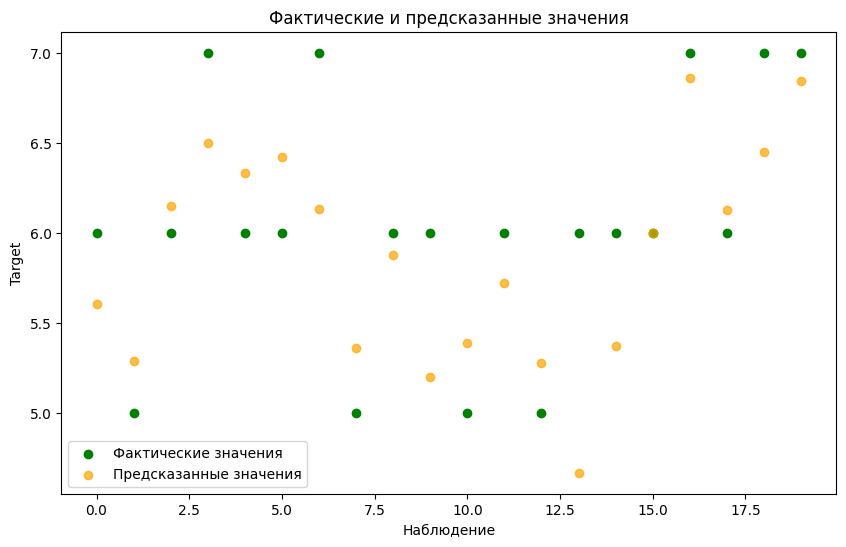

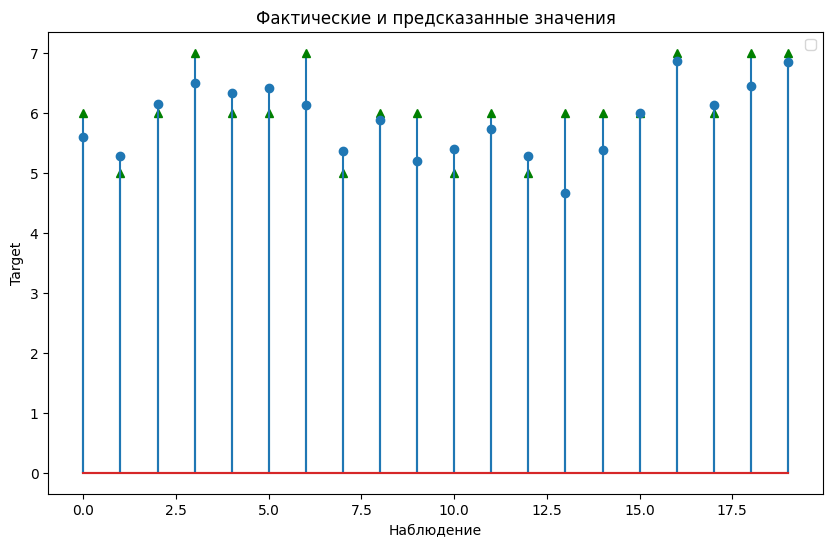

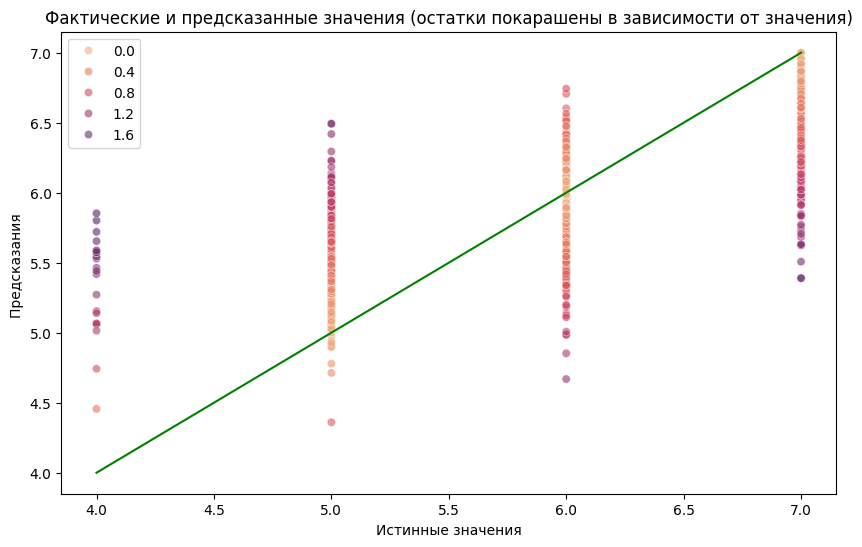

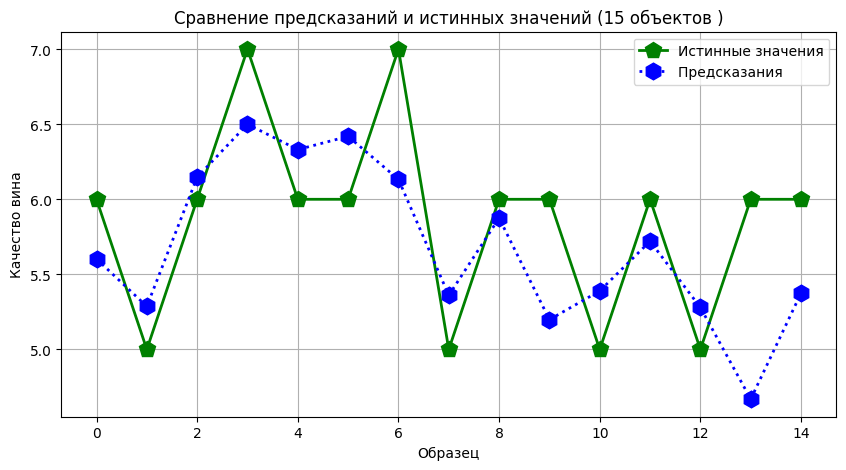

In [58]:

from sklearn.ensemble import RandomForestRegressor


def objective(trial):

   n_estimators = trial.suggest_int("n_estimators", 100, 150)
   model =  RandomForestRegressor(
    n_estimators=n_estimators,
    random_state=42,
    n_jobs=-1
     )
   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2

pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

rfr = RandomForestRegressor(
    n_estimators=study.best_params['n_estimators'],
    random_state=42,
    n_jobs=-1
)
rfr.fit(X_train, y_train)


y_pred = rfr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'RandomForestRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


еще одна деревянная модель справилась неплохо , но хуже чем Extra Trees

Best hyperparameters: {'iterations': 146, 'learning_rate': 0.09576632572443597, 'depth': 6}
Best value: 0.4002543785556292
*****************
Метрики качества модели:
*****************
MAE: 0.4974
MSE: 0.3675
RMSE: 0.6062
R²: 0.4003


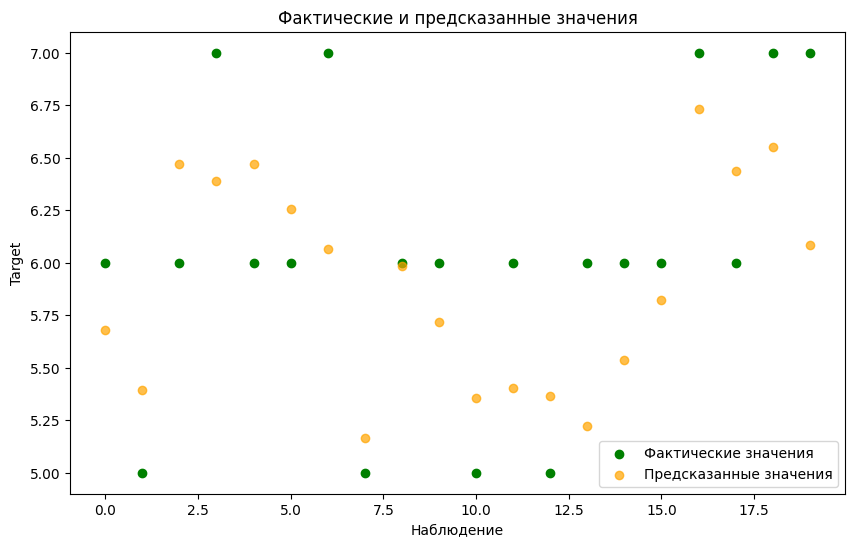

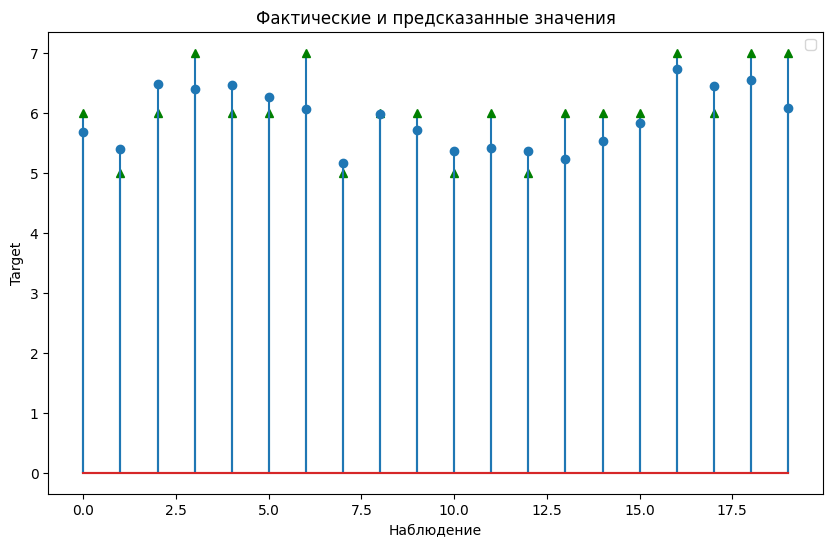

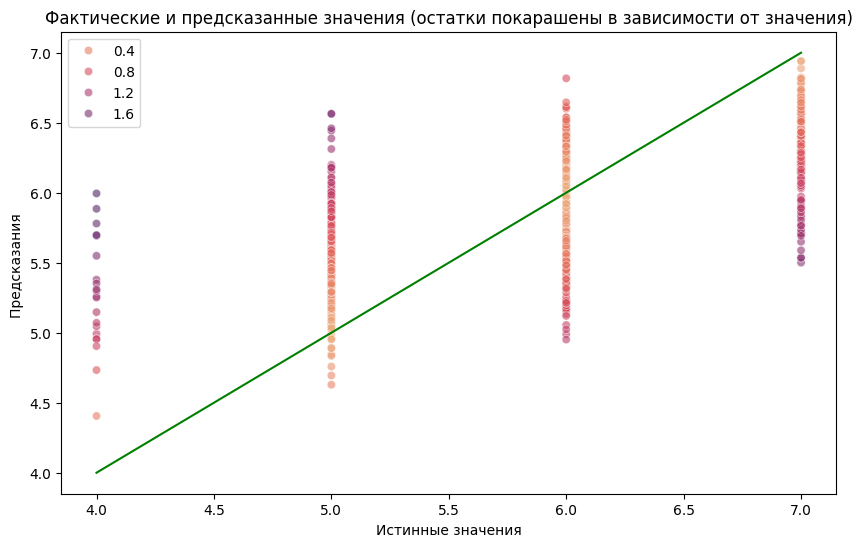

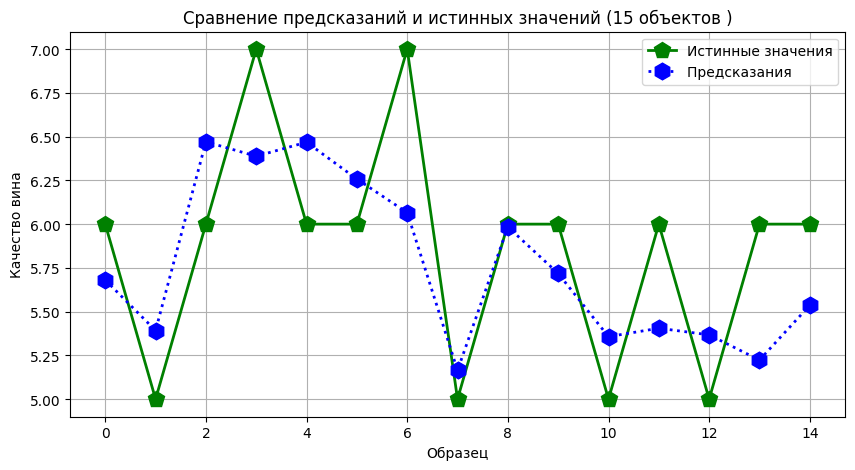

In [59]:
!pip install catboost
from catboost import CatBoostRegressor

def objective(trial):

   iterations = trial.suggest_int("iterations", 100, 150)
   learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
   depth = trial.suggest_int("depth", 3, 6)
   model =   CatBoostRegressor(iterations=iterations, learning_rate=learning_rate, depth=depth, random_state=42, verbose=0)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2

pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)


regressor = CatBoostRegressor(iterations=study.best_params['iterations'], learning_rate=study.best_params['learning_rate'], depth=study.best_params['depth'], random_state=42, verbose=0)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'CatBoostRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Метрика средняя , однако у нас нет категориальных признаков , модель немного не для этого датасета

Best hyperparameters: {'n_estimators': 109}
Best value: 0.2650647089306446
*****************
Метрики качества модели :
*****************
MAE: 0.5536
MSE: 0.4503
RMSE: 0.6711
R²: 0.2651


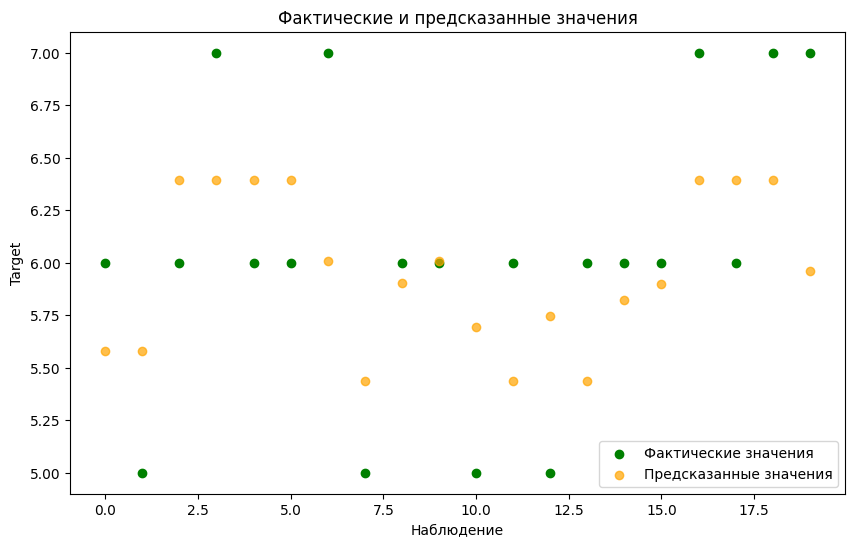

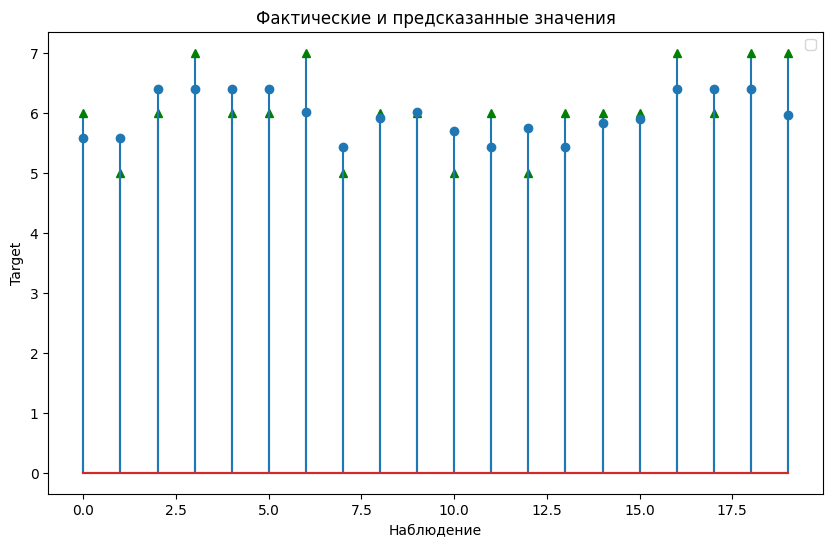

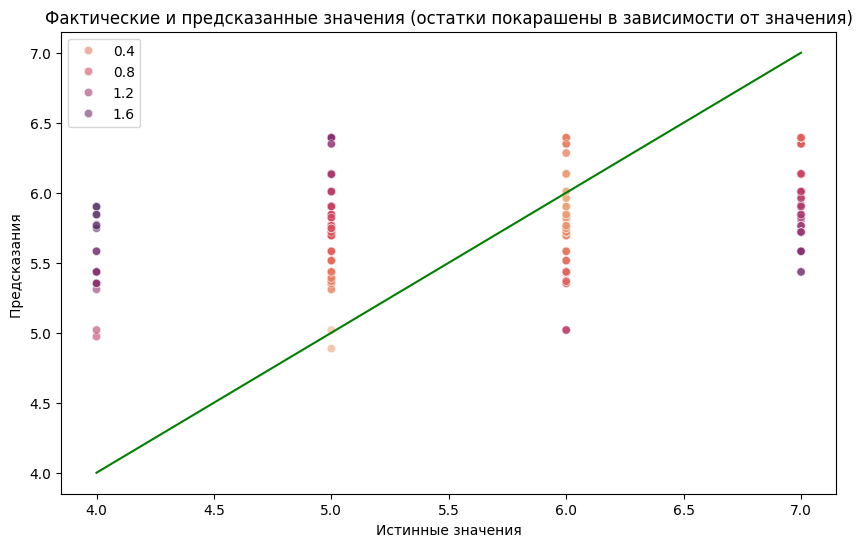

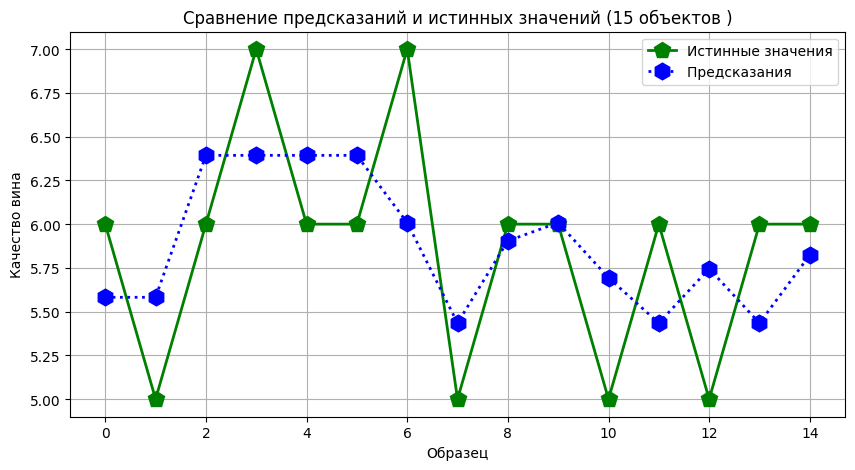

In [60]:

from sklearn.ensemble import AdaBoostRegressor


def objective(trial):

   n_estimators = trial.suggest_int("n_estimators", 100, 200)

   model =    AdaBoostRegressor(n_estimators=n_estimators,  random_state=42)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2
pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)


regressor = AdaBoostRegressor(n_estimators=study.best_params['n_estimators'], random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'AdaBoostRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Метрика низкая , модель имеет большие недо- и пере- предсказания .

Best hyperparameters: {'max_iter': 130}
Best value: 0.220935583565683
*****************
Метрики качества модели:
*****************
MAE: 0.5693
MSE: 0.4774
RMSE: 0.6909
R²: 0.2209


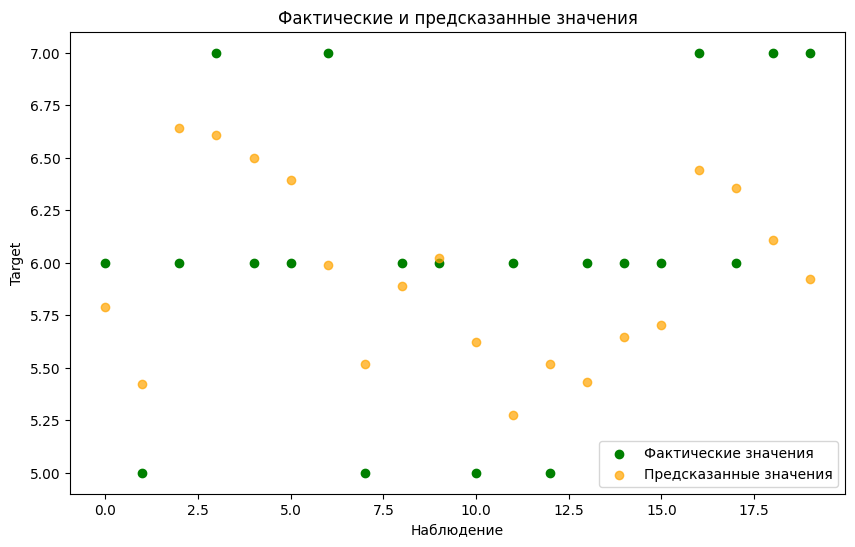

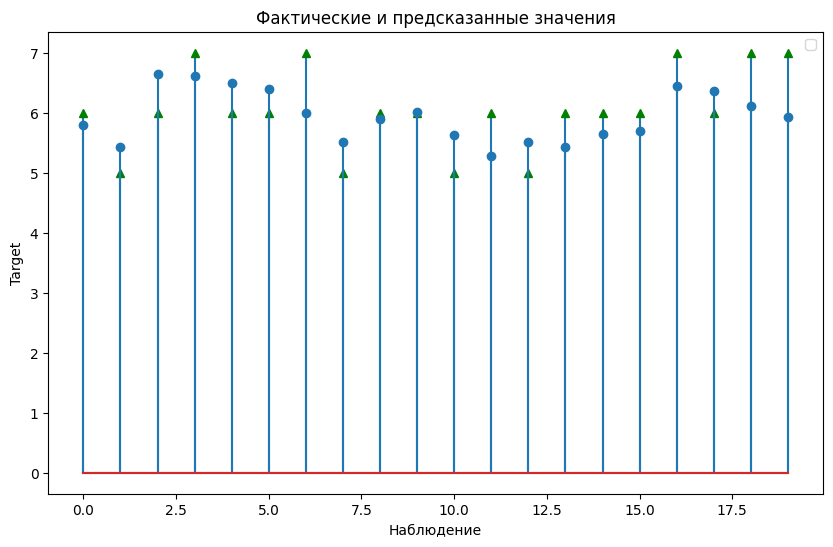

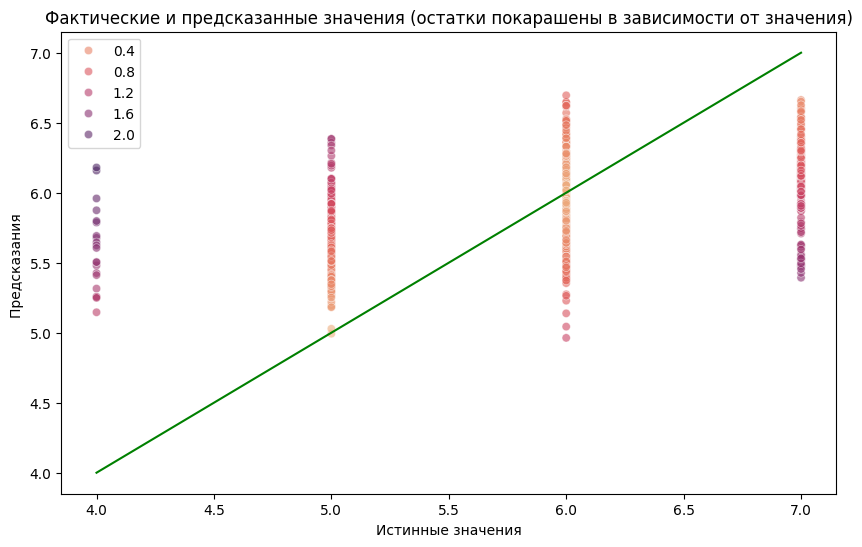

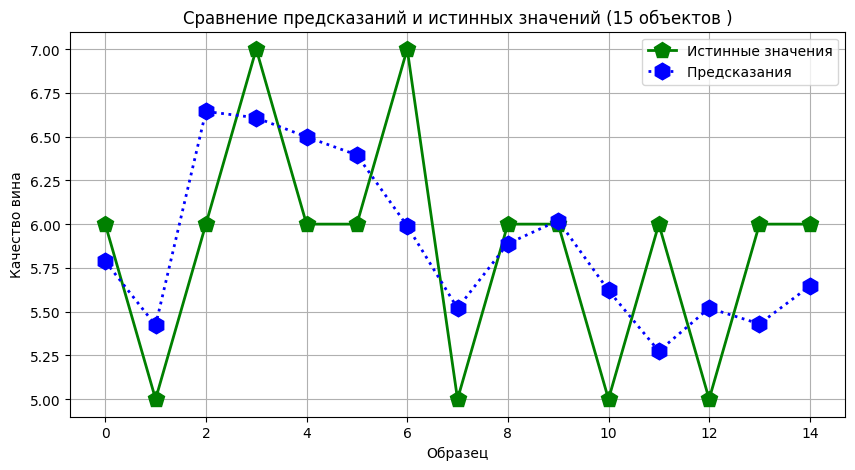

In [61]:

from sklearn.linear_model import Lasso
def objective(trial):

   max_iter = trial.suggest_int("max_iter", 100, 200)

   model =   Lasso(alpha=0.02,max_iter=max_iter,tol=0.01)

   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2
pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)



regressor = Lasso(alpha=0.02,max_iter=study.best_params['max_iter'],tol=0.01)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'Lasso',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Метрика так же низкая , видимо данная регуляризация не совсем подходит

Best hyperparameters: {'alpha': 0.8999151222432256}
Best value: 0.2351819490013608
*****************
Метрики качества модели:
*****************
MAE: 0.5671
MSE: 0.4686
RMSE: 0.6846
R²: 0.2352


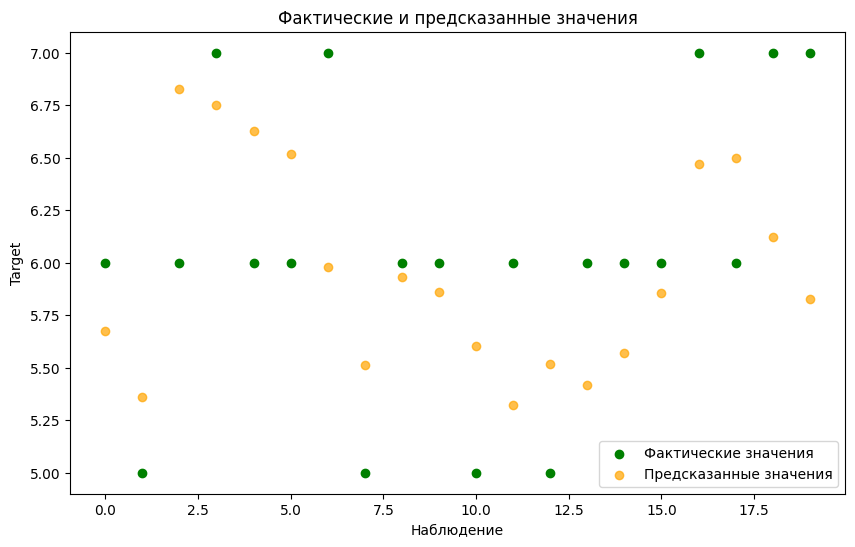

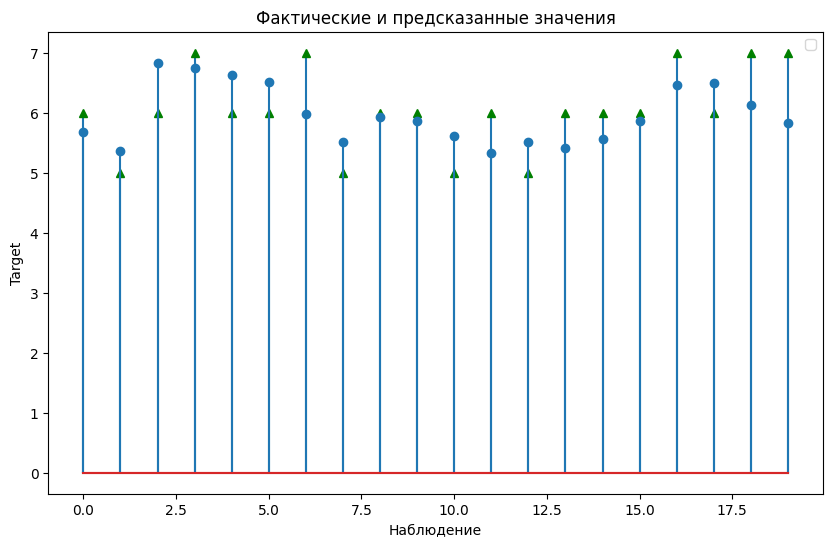

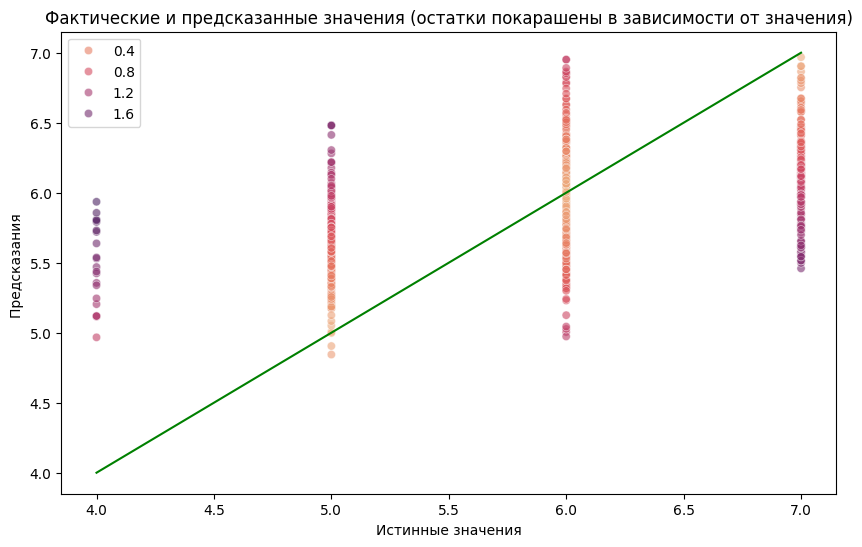

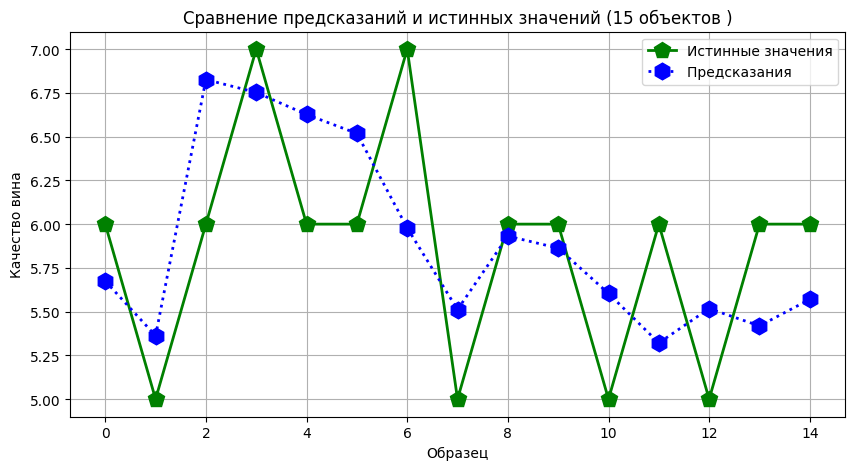

In [62]:

from sklearn.linear_model import Ridge

def objective(trial):

   alpha= trial.suggest_float("alpha", 0.5, 0.9)

   model =   Ridge(alpha=alpha, random_state=42)
   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2
pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)



ridge_reg = Ridge(alpha=study.best_params['alpha'], random_state=42)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'Ridge',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Модель совсем немного лучше Лассо , однако результаты не сильно улучшились

*****************
Метрики качества модели :
*****************
MAE: 0.5662
MSE: 0.4686
RMSE: 0.6846
R²: 0.2352


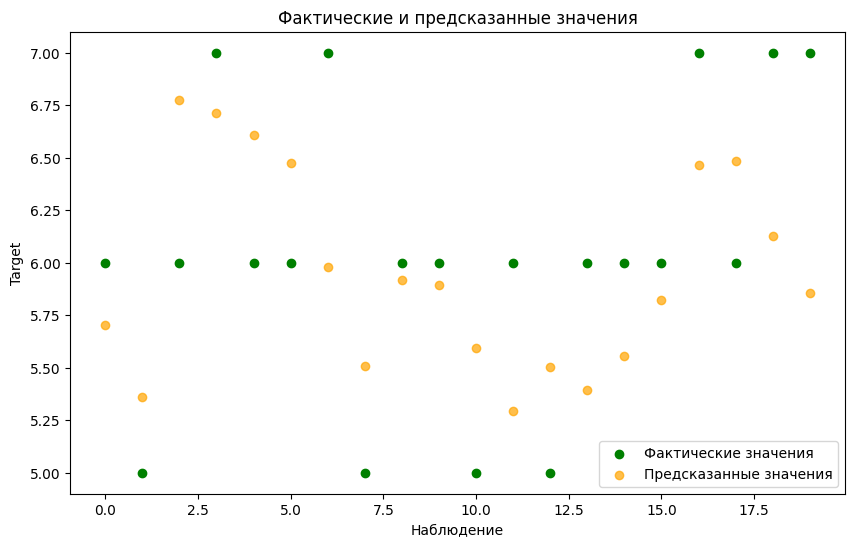

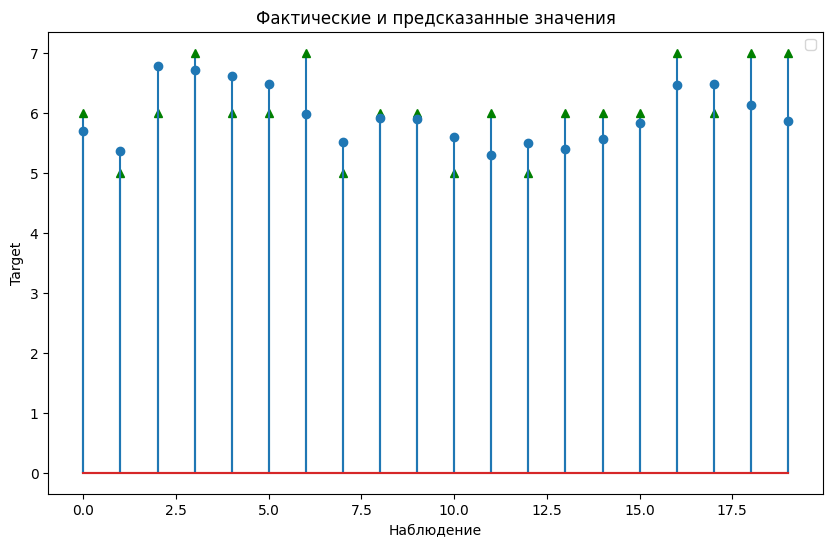

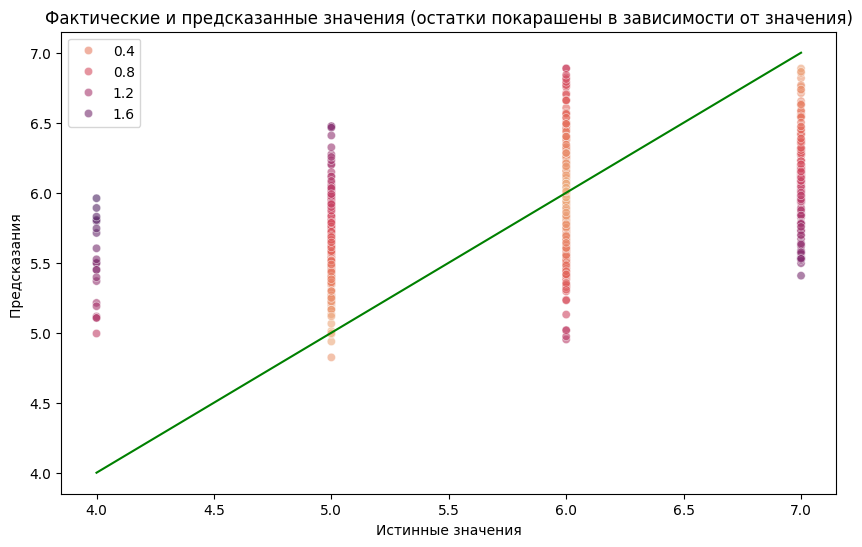

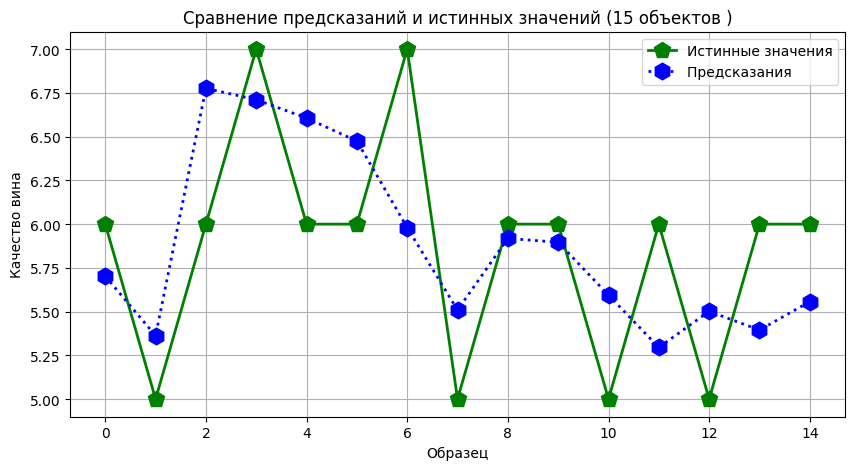

In [63]:

from sklearn.linear_model import BayesianRidge


bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)


y_pred = bayesian_ridge.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'BayesianRidge',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Метрика очень близкая к обычному Ridge , так же не очень

*****************
Метрики качества модели :
*****************
MAE: 0.5673
MSE: 0.4688
RMSE: 0.6847
R²: 0.2350


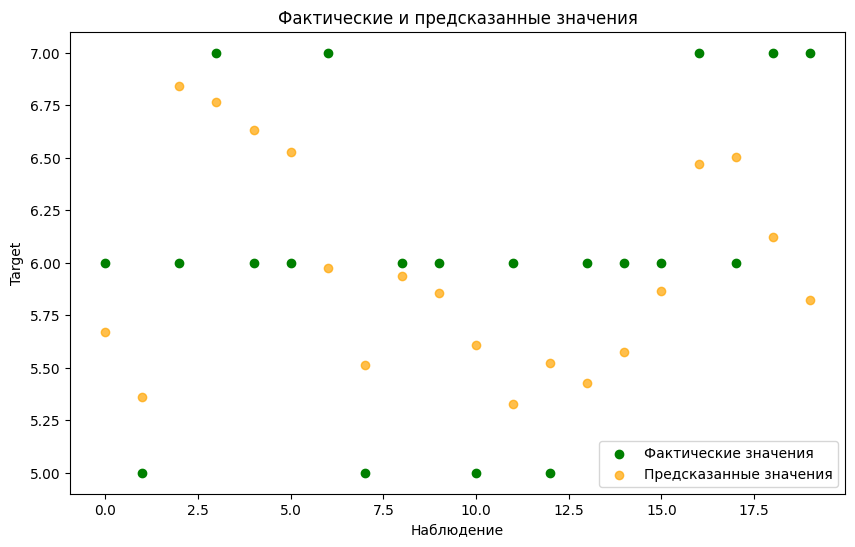

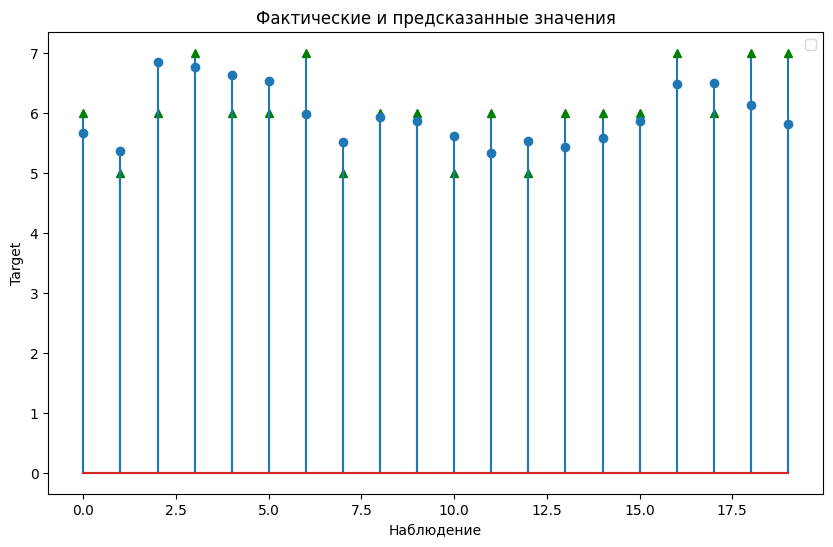

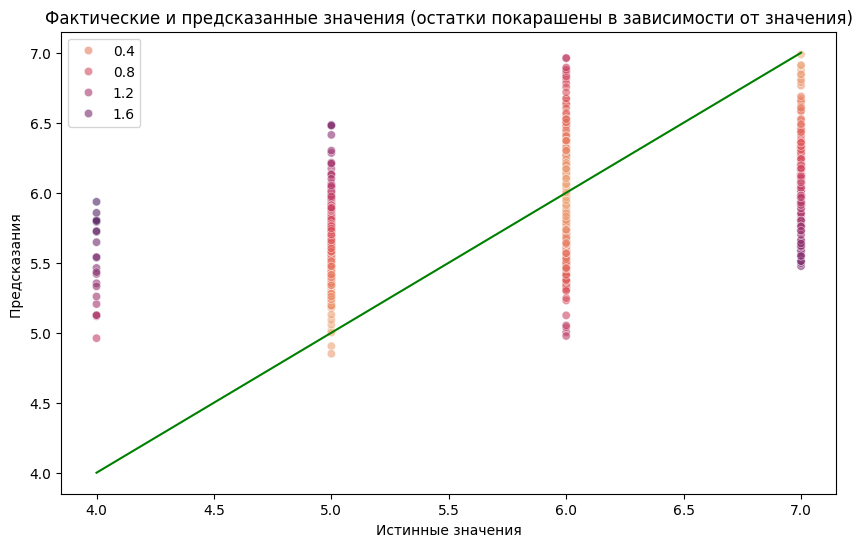

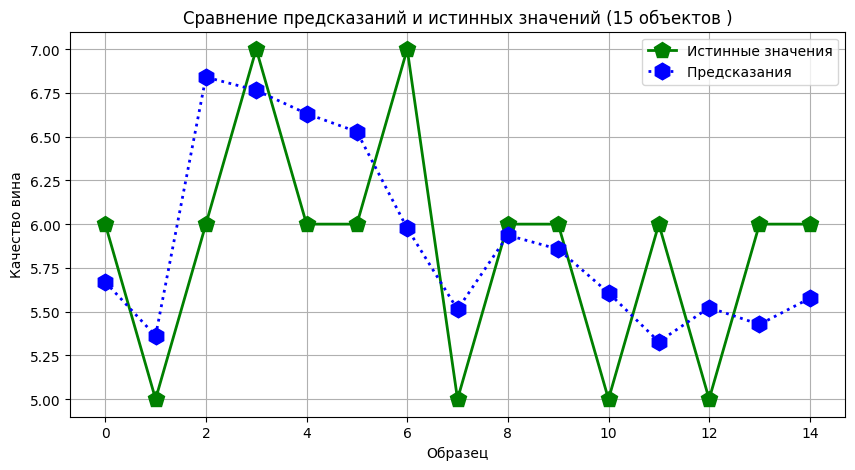

In [64]:

from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'LinearRegression',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Обычнаяя линейная регрессия дает низковатую метрику , примерно как и алгоритмы с регуляризацией

*****************
Метрики качества модели :
*****************
MAE: 0.5673
MSE: 0.4688
RMSE: 0.6847
R²: 0.2350


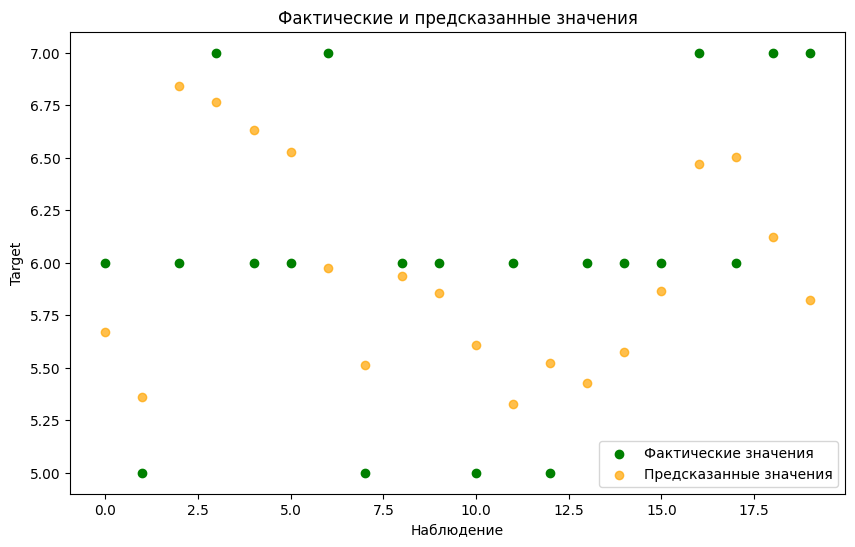

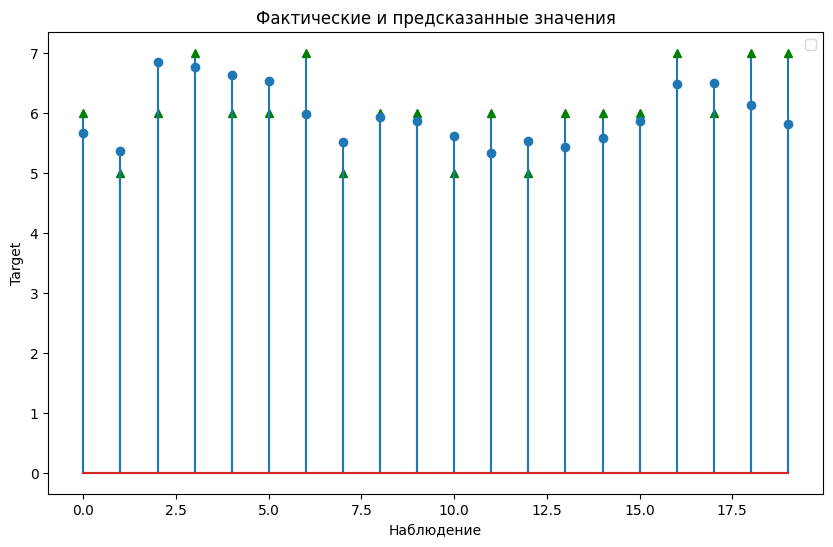

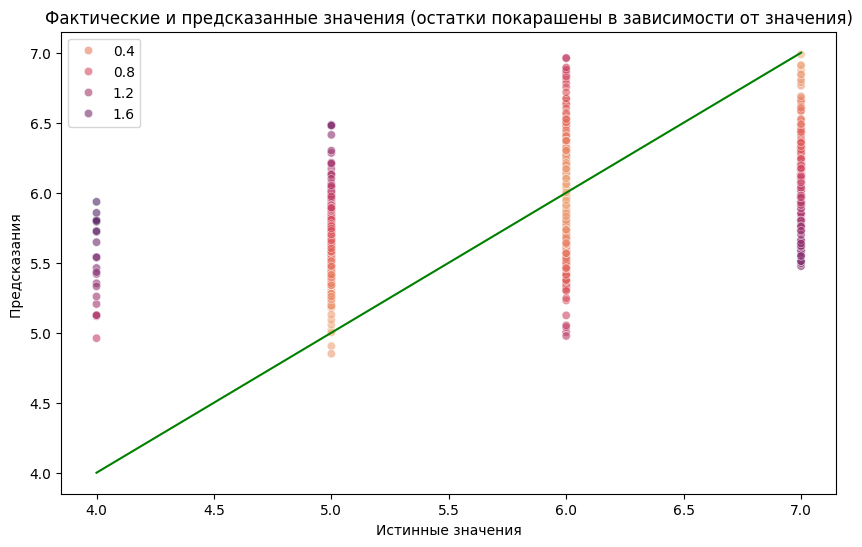

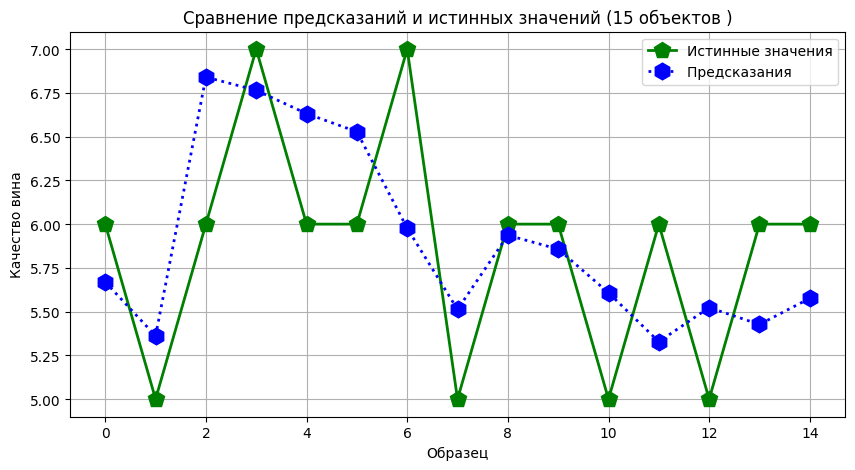

In [65]:

from sklearn.linear_model import HuberRegressor


model = HuberRegressor(epsilon=5000000000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'HuberRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


регрессия Губера дает похожую метрику с линейной .

Best hyperparameters: {'max_depth': 6}
Best value: 0.3029411025287131
*****************
Метрики качества модели :
*****************
MAE: 0.5436
MSE: 0.4500
RMSE: 0.6708
R²: 0.2657


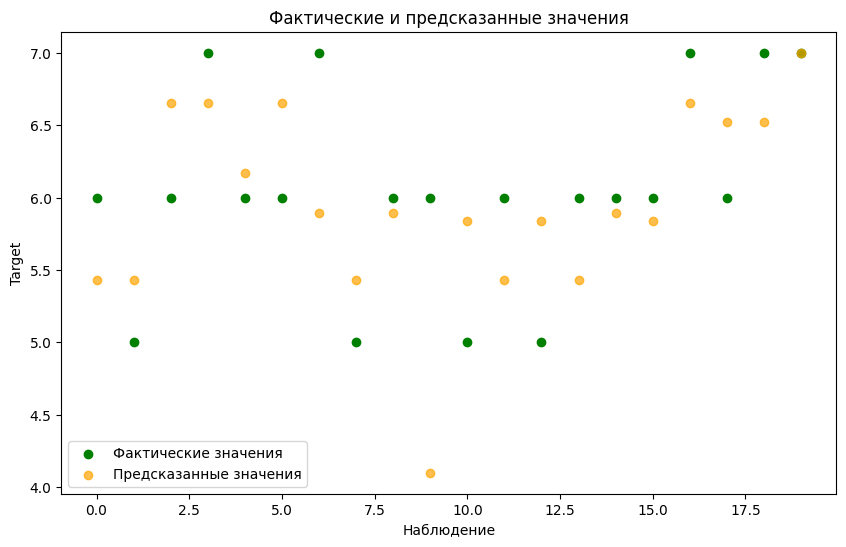

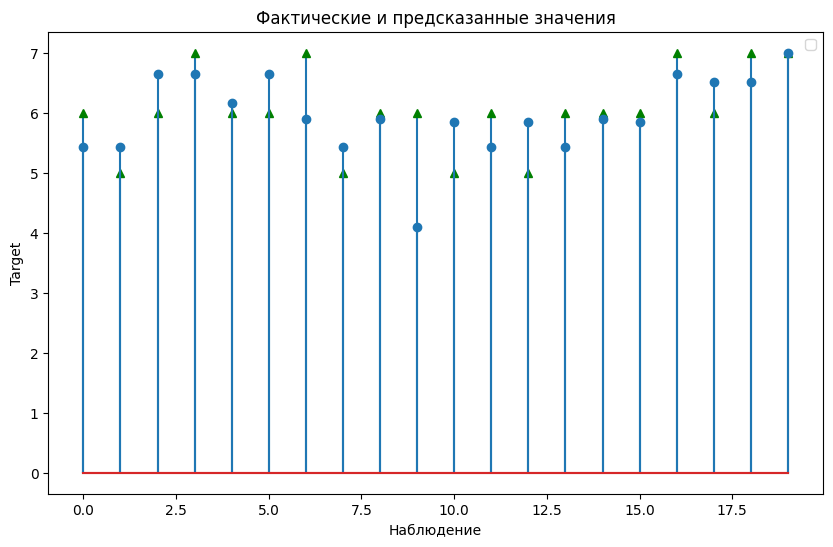

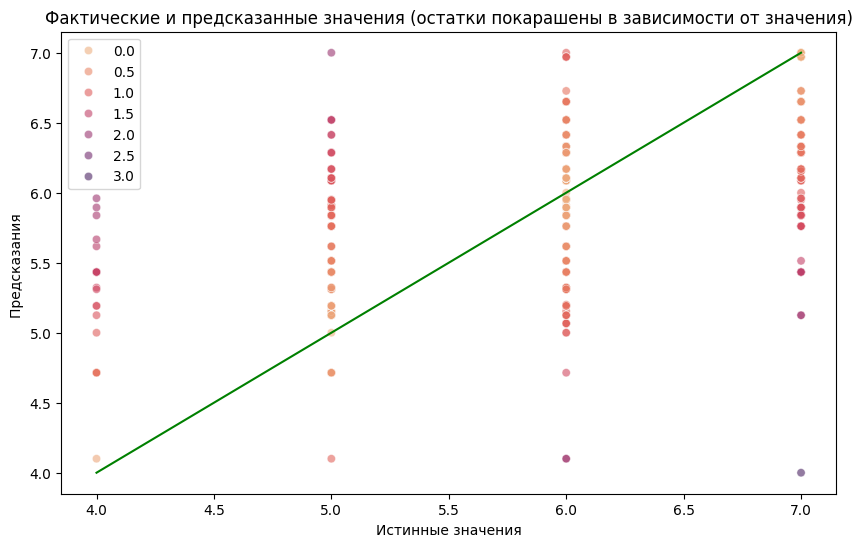

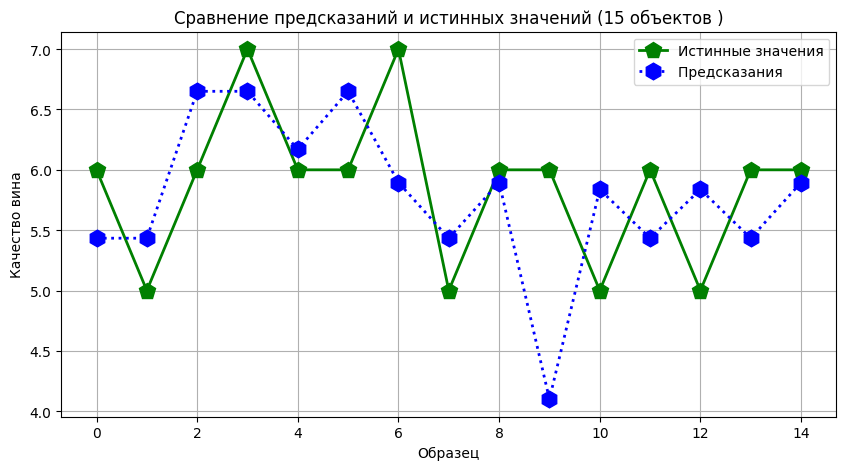

In [66]:

from sklearn.tree import DecisionTreeRegressor



def objective(trial):

   max_depth= trial.suggest_int("max_depth", 3, 6)

   model =   DecisionTreeRegressor(max_depth=max_depth)
   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2
pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

model = DecisionTreeRegressor(max_depth=study.best_params['max_depth'])
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'DecisionTreeRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Это деревянная модель почти в 2 раза уступает Extra trees.

*****************
Метрики качества модели:
*****************
MAE: 0.5858
MSE: 0.5080
RMSE: 0.7128
R²: 0.1709


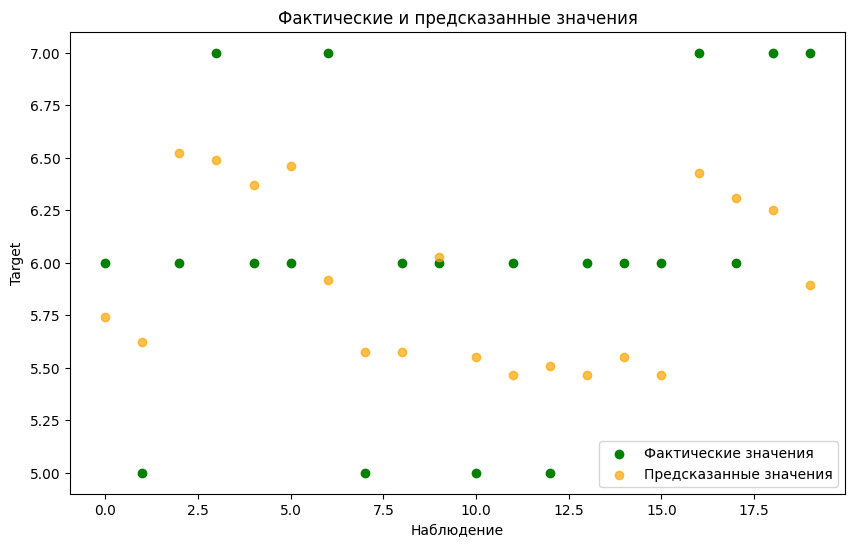

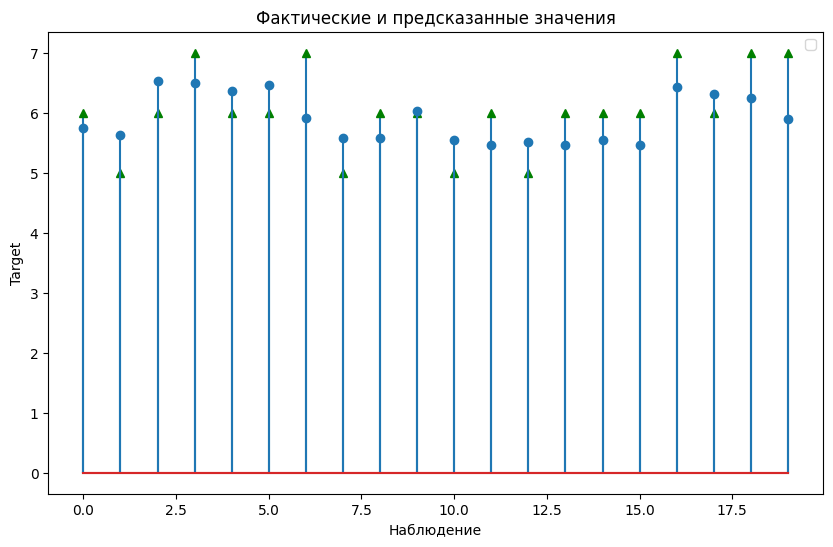

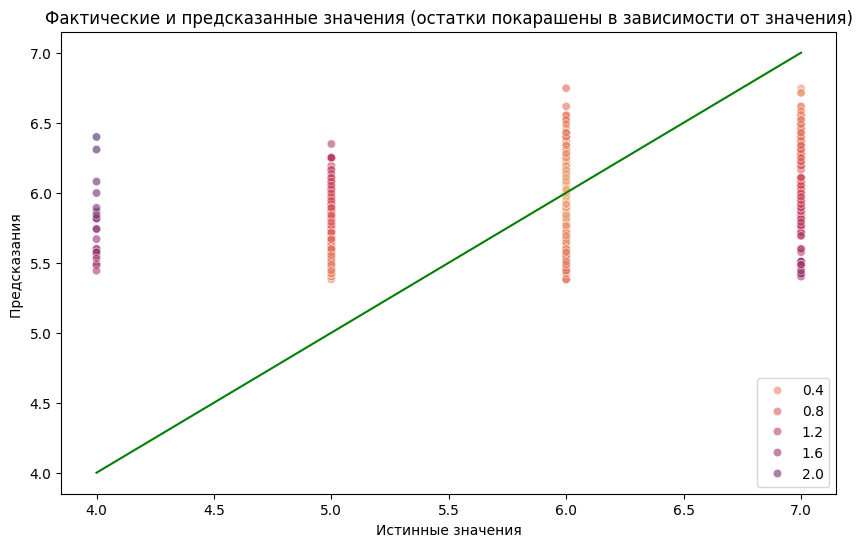

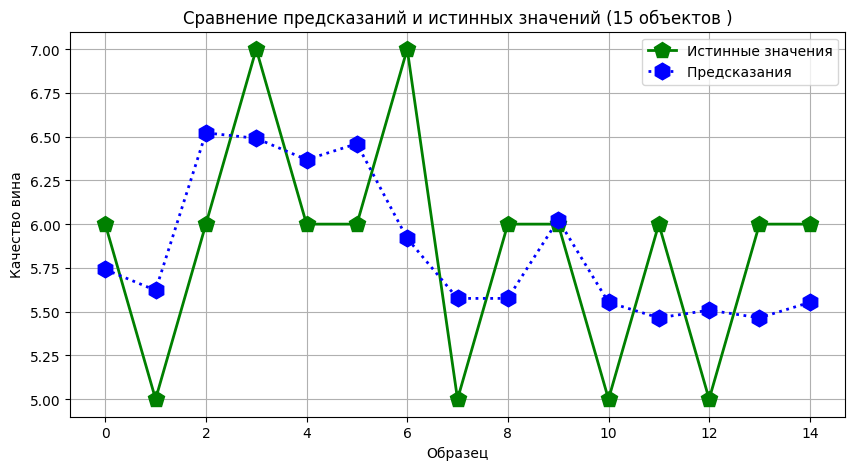

In [67]:

from sklearn.linear_model import OrthogonalMatchingPursuit



omp = OrthogonalMatchingPursuit(n_nonzero_coefs=1)
omp.fit(X_train, y_train)
y_pred = omp.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'OrthogonalMatchingPursuit',
                'R2':r2})

print(f'*****************')
print(f'Метрики качества модели:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Метрика ниже всех предыдущих.

*****************
Метрики качества модели :
*****************
MAE: 0.8908
MSE: 1.2132
RMSE: 1.1015
R²: -0.9800


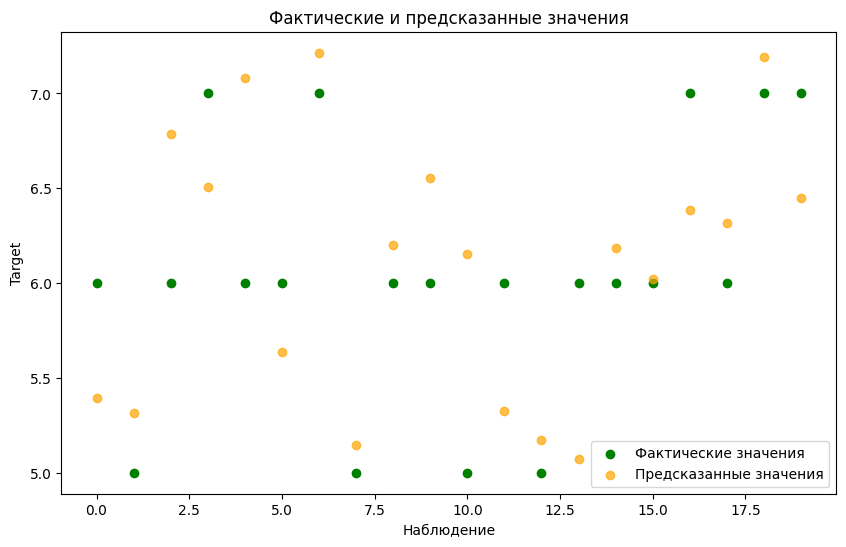

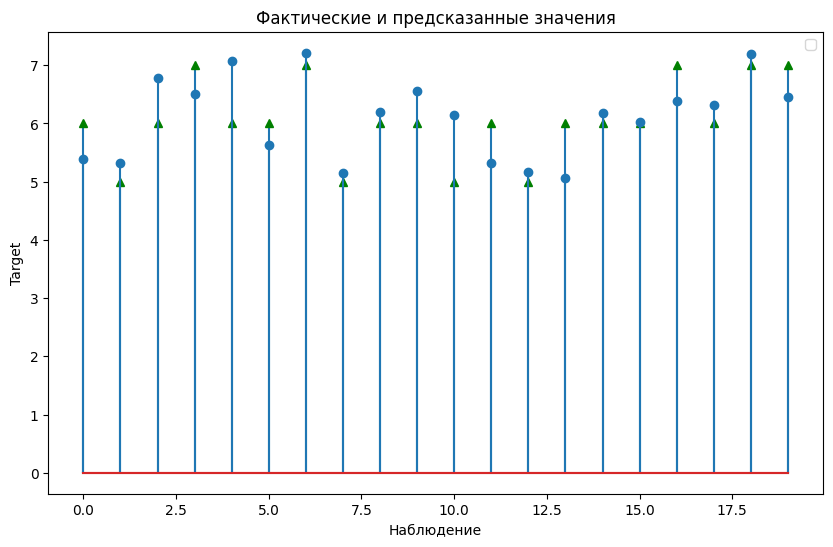

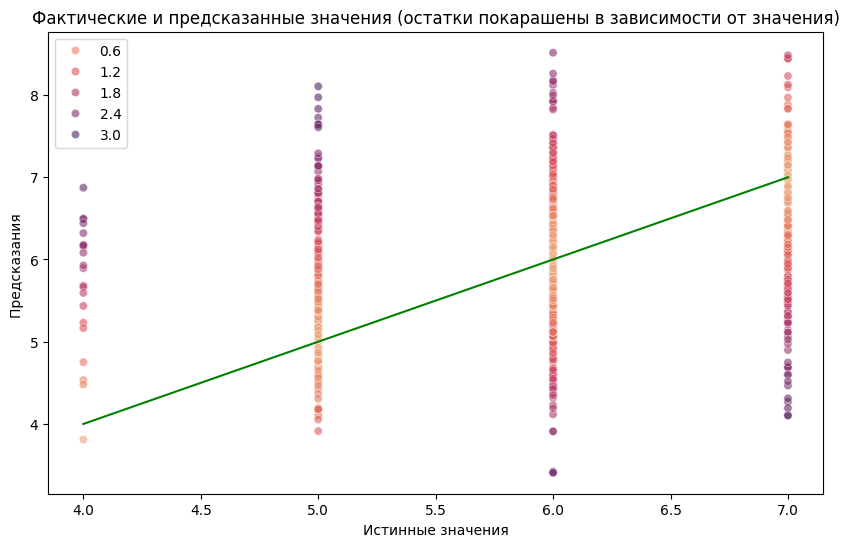

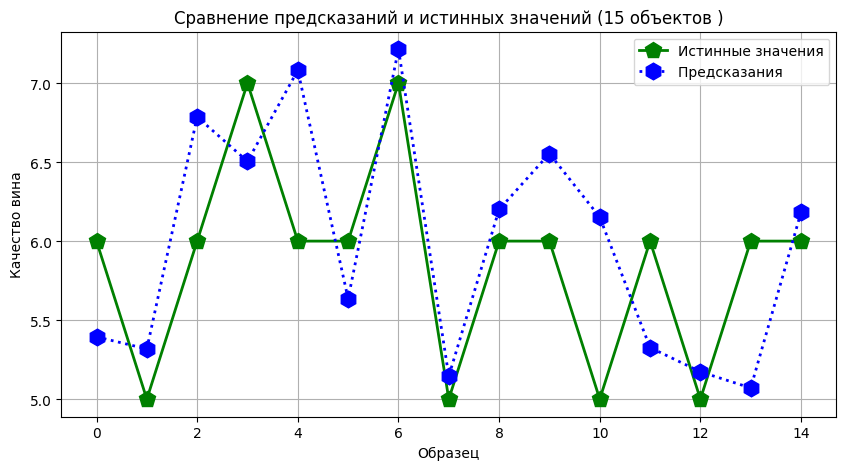

In [68]:

from sklearn.linear_model import PassiveAggressiveRegressor



par = PassiveAggressiveRegressor(C=1.0, loss='epsilon_insensitive', epsilon=0.1)
par.fit(X_train, y_train)


y_pred = par.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'PassiveAggressiveRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Модель делает неверные предсказания и уходит в хаос.

Best hyperparameters: {'n_neighbors': 10}
Best value: 0.3434118690851735
*****************
Метрики качества модели :
*****************
MAE: 0.5076
MSE: 0.4023
RMSE: 0.6343
R²: 0.3434


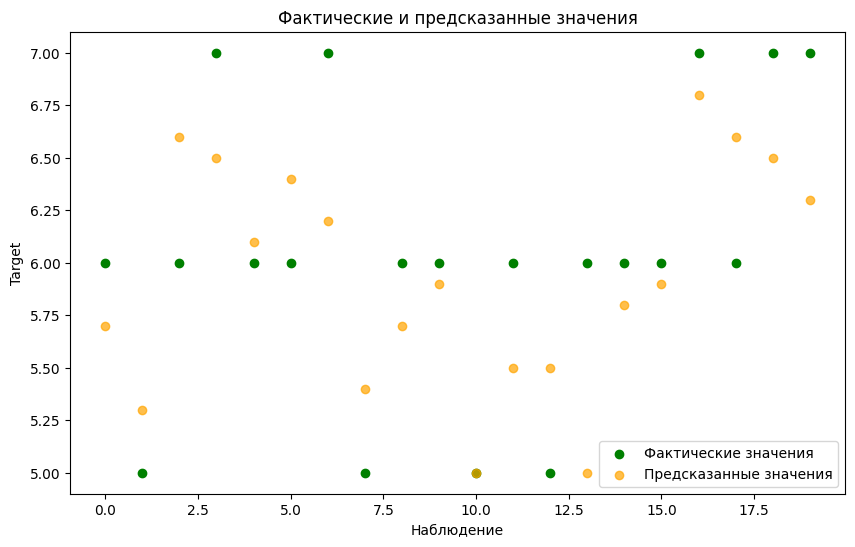

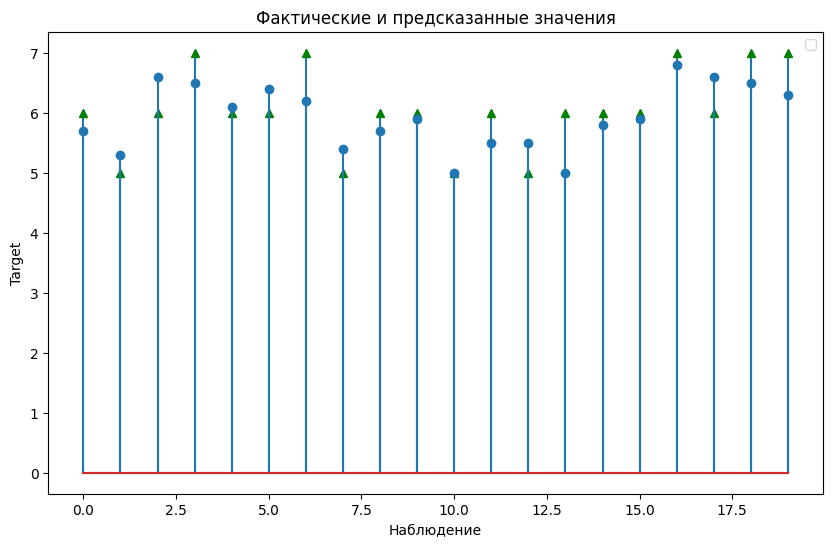

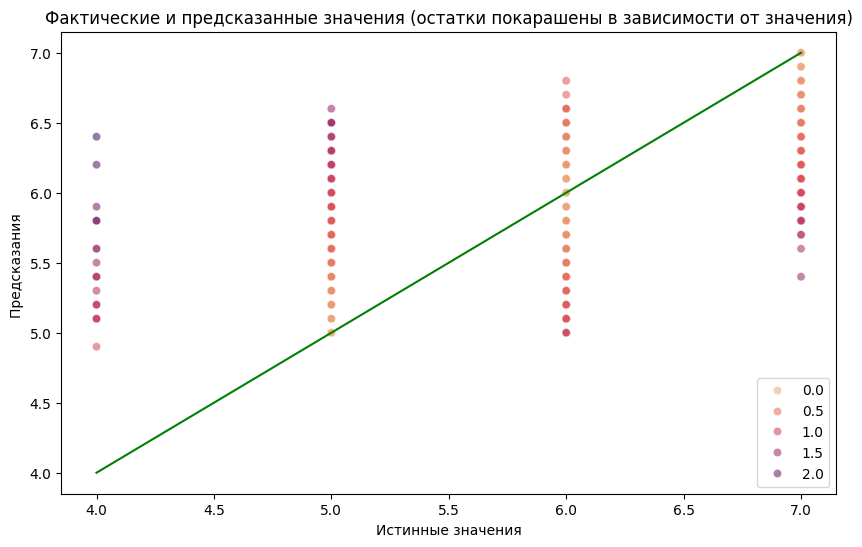

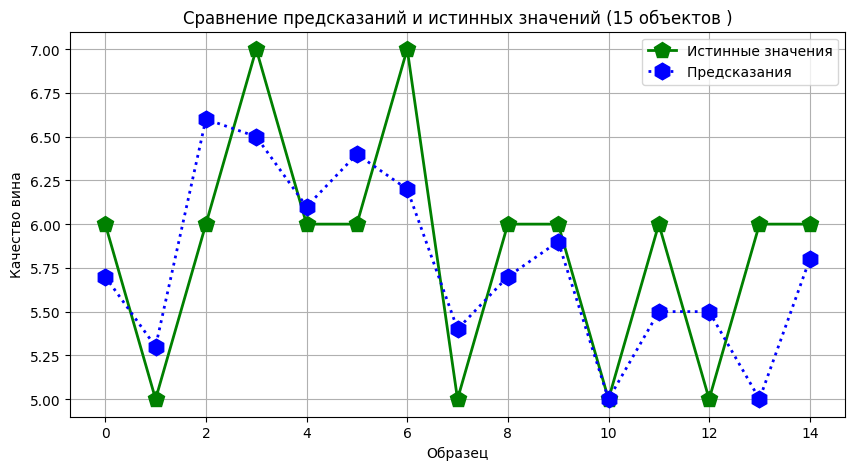

In [69]:

from sklearn.neighbors import KNeighborsRegressor
def objective(trial):

   n_neighbors = trial.suggest_int("n_neighbors", 9, 15)

   model =   KNeighborsRegressor(n_neighbors=n_neighbors )
   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2
pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)
knn_regressor = KNeighborsRegressor(n_neighbors=study.best_params['n_neighbors'])
knn_regressor.fit(X_train, y_train)


y_pred = knn_regressor.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'KNeighborsRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Модель ближайших соседей дает среднюю метрику

*****************
Метрики качества модели :
*****************
MAE: 0.6190
MSE: 0.6128
RMSE: 0.7828
R²: -0.0001


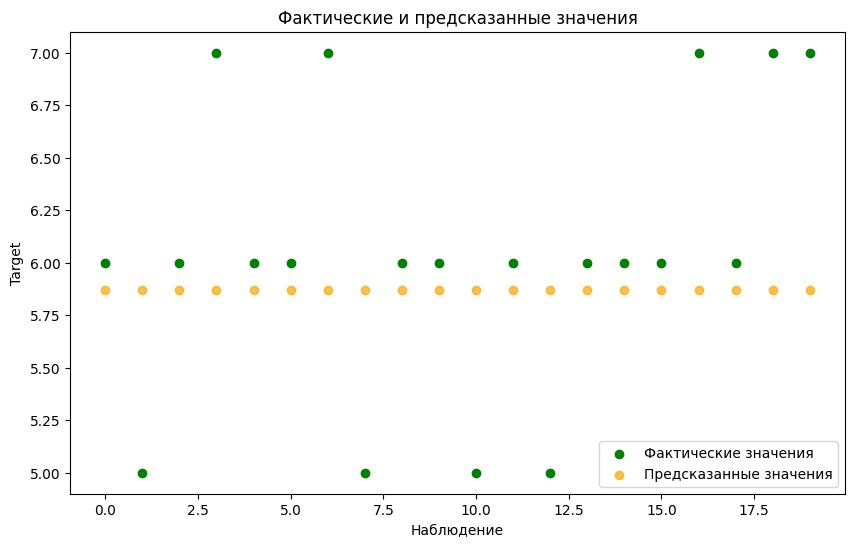

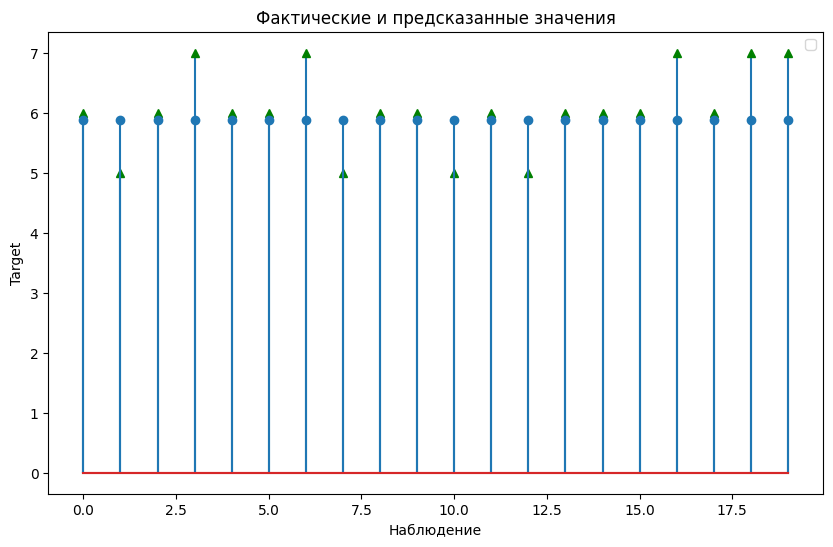

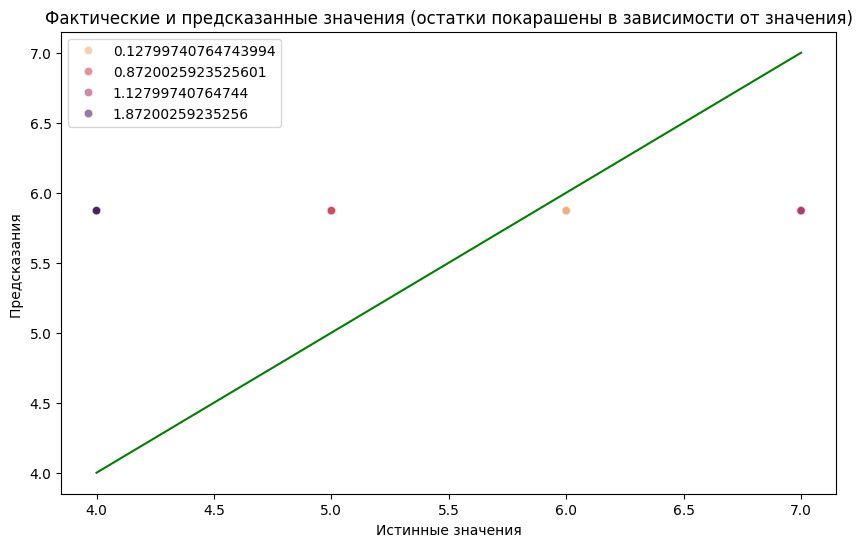

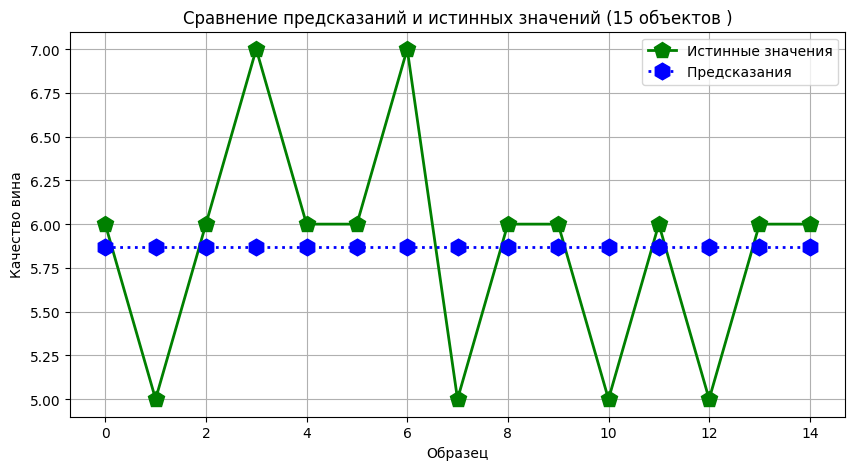

In [70]:

from sklearn.dummy import DummyRegressor


dummy_regressor = DummyRegressor(strategy='mean')

dummy_regressor.fit(X_train, y_train)


y_pred= dummy_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'DummyRegressor',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели :')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Предсказывает среднее , теперь  у нас есть значение R2 для сравнения с другими моделями - это почти 0  в этой модели

Best hyperparameters: {'alpha': 0, 'l1_ratio': 0}
Best value: 0.23506212816434302
*****************
Метрики качества модели:
*****************
MAE: 0.5672
MSE: 0.4687
RMSE: 0.6846
R²: 0.2351


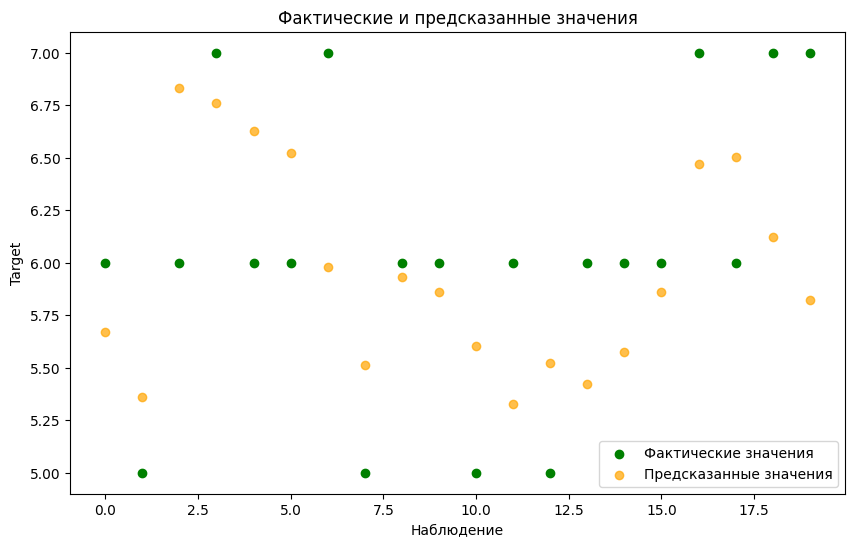

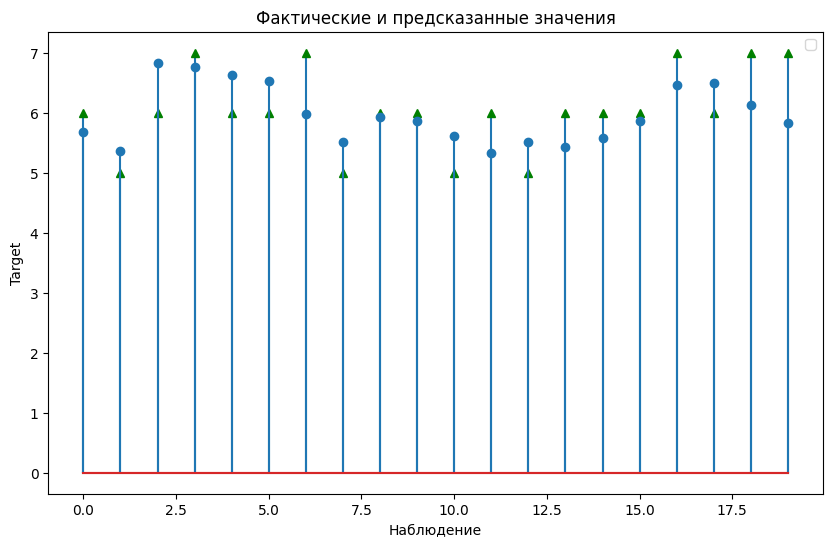

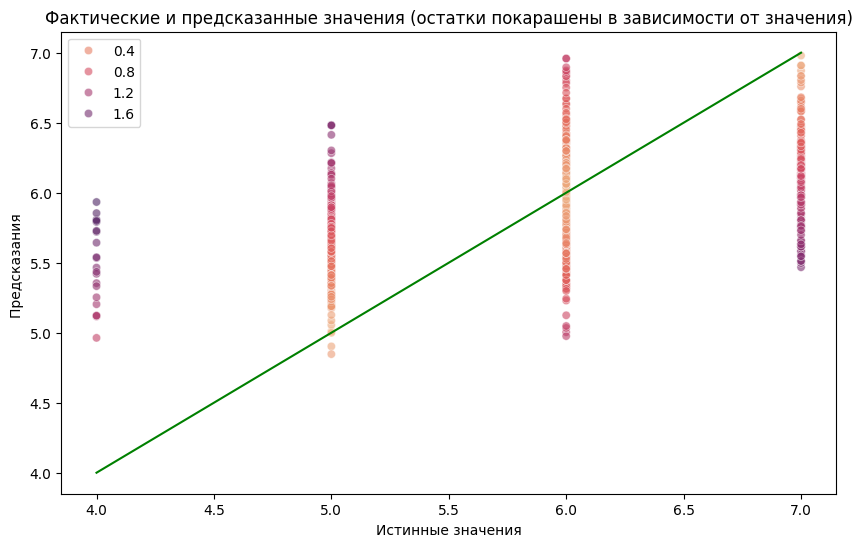

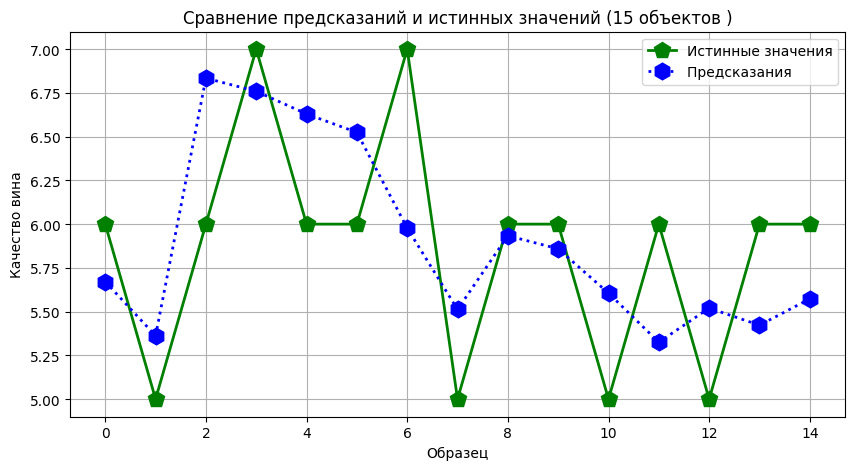

In [71]:

from sklearn.linear_model import ElasticNet

def objective(trial):

   alpha = trial.suggest_int("alpha", 0.1, 1)
   l1_ratio = trial.suggest_int("l1_ratio", 0.5, 1)

   model =  ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
   model.fit(X_train, y_train)

   y_pred = model.predict(X_test)


   r2 = r2_score(y_test, y_pred)
   return r2
pruner = optuna.pruners.MedianPruner()
optuna.logging.disable_default_handler()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

elastic_net = ElasticNet(alpha=study.best_params['alpha'], l1_ratio=study.best_params['l1_ratio'], random_state=42)


elastic_net.fit(X_train, y_train)


y_pred= elastic_net.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'ElasticNet',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


Дает метрику похожую на обычную линейную регрессию

*****************
Метрики качества модели:
*****************
MAE: 0.4627
MSE: 0.3439
RMSE: 0.5864
R²: 0.4388


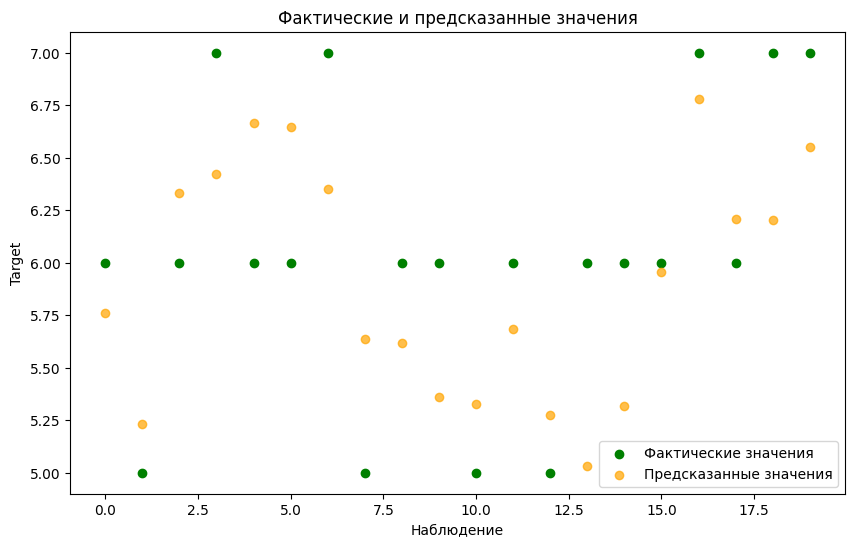

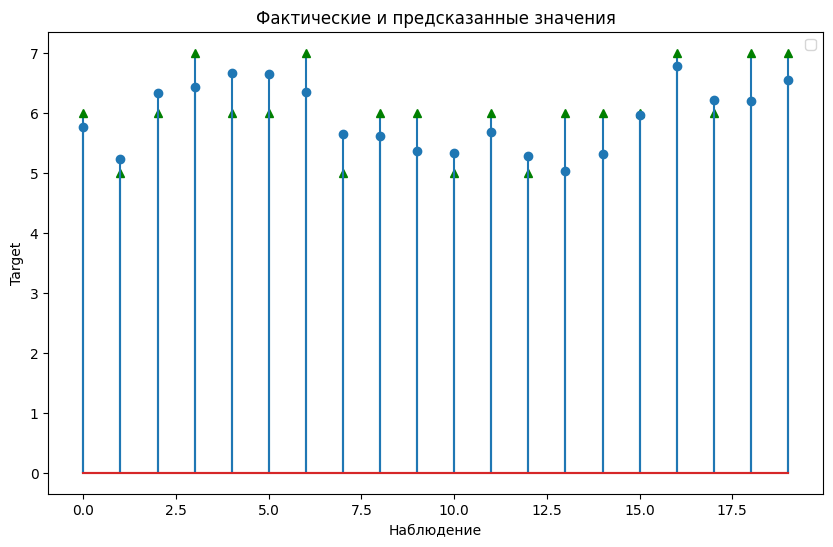

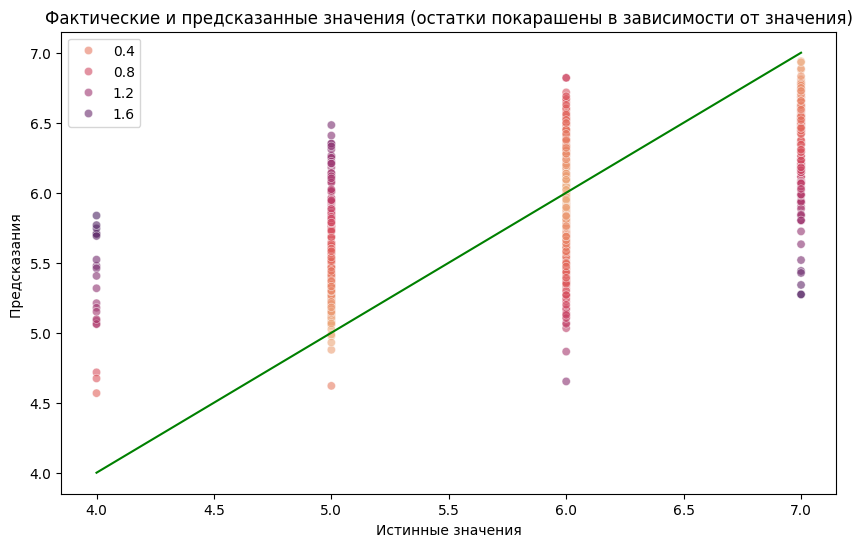

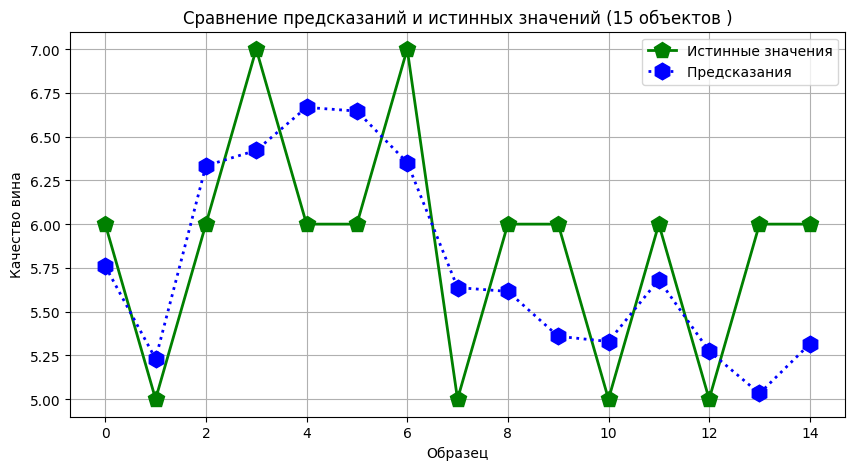

In [72]:

from sklearn.ensemble import VotingRegressor

regressor1 = LinearRegression()
regressor2 = DecisionTreeRegressor(random_state=42)
regressor3 = RandomForestRegressor(n_estimators=100, random_state=42)



voting_regressor = VotingRegressor(estimators=[
    ('lr', regressor1),
    ('dt', regressor2),
    ('rf', regressor3)
])


voting_regressor.fit(X_train, y_train)


y_pred = voting_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'Voting',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


голосование помогает улучшить метрику , модели работают лучше чем по отдельности

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1178
[LightGBM] [Info] Number of data points in the train set: 3086, number of used features: 12
[LightGBM] [Info] Start training from score 5.872003
*****************
Метрики качества модели:
*****************
MAE: 0.4611
MSE: 0.3674
RMSE: 0.6061
R²: 0.4005


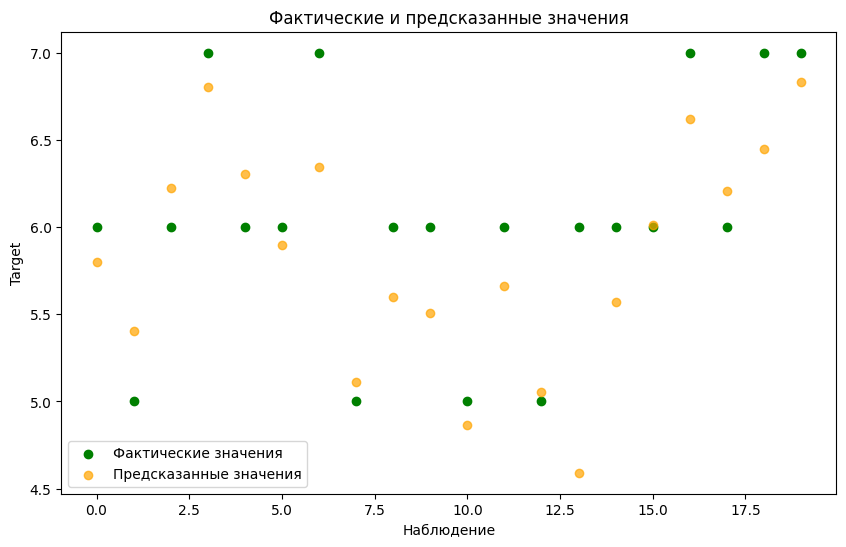

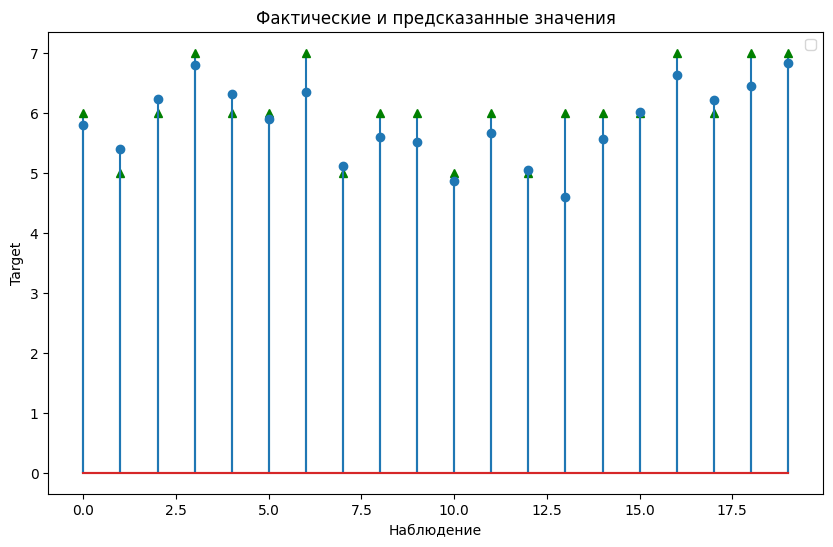

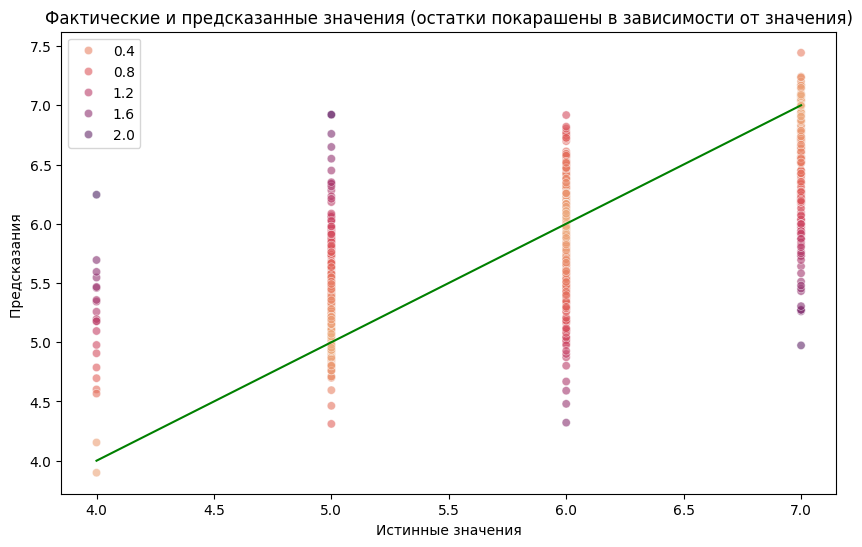

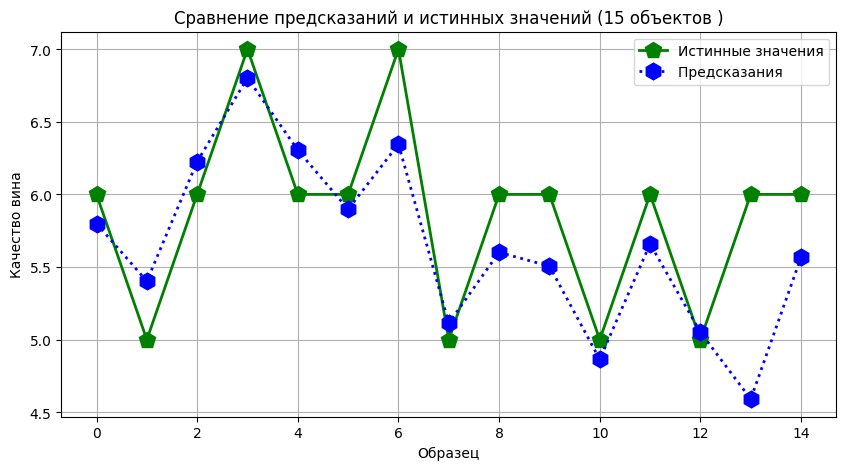

In [73]:

from mlxtend.regressor import StackingRegressor

regressor1 = LGBMRegressor()
regressor2 = XGBRegressor(n_estimators=136,learning_rate= 0.08,max_depth= 4)
regressor3 = CatBoostRegressor(iterations=146, learning_rate=0.09, depth=6, random_state=42, verbose=0)

idge_reg = Ridge(alpha=0.8, random_state=42)
stregr = StackingRegressor(regressors=[regressor1, regressor2, regressor3],
                           meta_regressor=ridge_reg)


stregr.fit(X_train, y_train)
y_pred=stregr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2comparison.append({'model':'Stacking',
                'R2':r2})
print(f'*****************')
print(f'Метрики качества модели:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

plt.figure(figsize=(10, 6))
plt.scatter(range(20), y_test[:20], color='green', label='Фактические значения')
plt.scatter(range(20), y_pred[:20], color='orange', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(range(20), y_test[:20],markerfmt='g^')
plt.stem(range(20), y_pred[:20])
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()




residuals = abs(y_test - y_pred)


plt.figure(figsize=(10,6))

scatter = sns.scatterplot(x=y_test, y=y_pred, hue=residuals, palette='flare', alpha=0.6)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='green')


plt.title('Фактические и предсказанные значения (остатки покарашены в зависимости от значения)')

plt.xlabel("Истинные значения")

plt.ylabel("Предсказания ")

plt.show()








plt.figure(figsize=(10, 5))
plt.plot(range(15),y_test[:15], label="Истинные значения", color='green', marker='p',

     linewidth=2, markersize=12)
plt.plot(range(15),y_pred[:15], label=f"Предсказания ", color='blue', marker='h', linestyle=':',

     linewidth=2, markersize=12)

plt.title("Сравнение предсказаний и истинных значений (15 объектов )")
plt.xlabel("Образец")
plt.ylabel("Качество вина")
plt.legend()
plt.grid(True)
plt.show()


стекинг повысил метрику , однако хуже чем голосование

                   model        R2
0           GradBoosting  0.364224
1          LGBMRegressor  0.441356
2           XGBRegressor  0.351445
3  Extra Trees Regressor  0.503438
4  RandomForestRegressor  0.475537


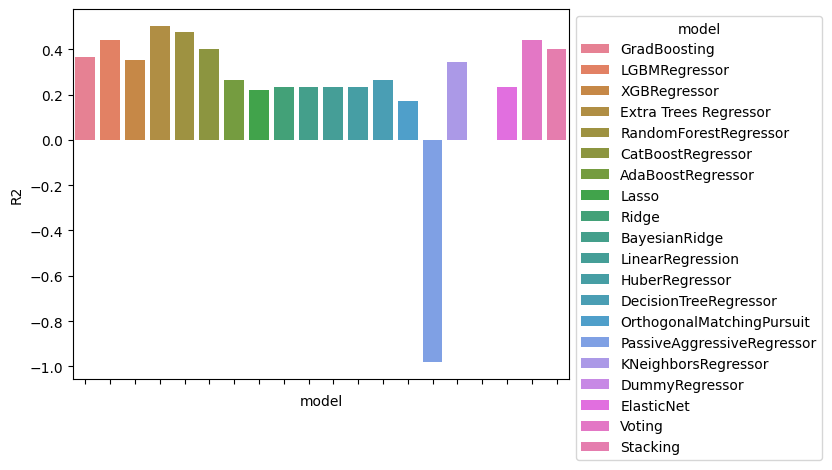

In [74]:
comp = pd.DataFrame.from_records(r2comparison)
print(comp.head())




ax = sns.barplot(comp,x="model",y="R2",hue="model",legend='full')
ax.set_xticklabels("")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


Лучшая модель - Extra Trees.